# 3803ICT - Big Data Analysis
# Assignment 1

### Bennett Taylor - S5095512

In [109]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
from IPython.display import Markdown
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

# Part 1 - Data Preparation and Preprocessing

# 1.1) Describe the dataset

### Load the dataset using pd.read_csv

In [96]:
df = pd.read_csv("data.csv", low_memory=False)
#low_memory=False is an optional parameter which allows pandas to use more memory to determine the correct datatype for each attribute
#not having this can cause Pandas to guess the datatype, which can lead to faulty results

### Visualize the head of dataset to describe its properties

In [97]:
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head()

The Dataset consists of:  318477  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


<h1>Dataset Description</h1>

<p>The data set consists of 318477 job postings from seek.com from the 1st of October 2018 - 13th of March 2019. 
There are 13 attributes(columns) that make up an entry as seen above. At first glance it looks as though there will be missing data 
in the FullDescription and JobType attributes. Missing data and dataypes will be investigated further in the 
next step of the analysis in order to perform data preprocessing and cleaning.</p>

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [99]:
print("Attribute : No. of Variations",
"\nId =", df['Id'].nunique(),
"\nTitle =", df['Title'].nunique(),
"\nCompany =", df['Company'].nunique(),
"\nDate =", df['Date'].nunique(),
"\nLocation =", df['Location'].nunique(),     
"\nArea =", df['Area'].nunique(),
"\nClassification =", df['Classification'].nunique(),
"\nSub-Classification =", df['SubClassification'].nunique(),
"\nRequirement =", df['Requirement'].nunique(),
"\nFull Description =", df['FullDescription'].nunique(),
"\nHighest Salary =", df['HighestSalary'].nunique(),
"\nLowest Salary =", df['LowestSalary'].nunique(),
"\nJob Type =", df['JobType'].nunique())

Attribute : No. of Variations 
Id = 318477 
Title = 168065 
Company = 40628 
Date = 163 
Location = 65 
Area = 19 
Classification = 30 
Sub-Classification = 338 
Requirement = 234287 
Full Description = 250901 
Highest Salary = 11 
Lowest Salary = 11 
Job Type = 4


<ul>
<li>The number of different ID's is equal to the size of the dataset. This is because each ID uniquely identifies a particular job post. Since the ID does not provide any other information that would be useful for analysis, it can be safely disregarded and removed from the dataset.</li><br>
    
<li> The number of variataions for job title is quite large as well, matching the size of the dataset. This indicates that there is not a uniform standard of choosing job titles. This means same Job could have two different titles/names (for example, Full Stack Developer=Full Stack Dev).Since this attribute is given in a textual format, it will be hard to divide into categories unless we know each job titles excact meaning. Since there is such a large number of tiltes in this attribute, it will be hard to extract information from to teach us about the dataset as a whole. </li><br>
    
<li> full description is given in a textual format and is quite large as well.This means there is not a uniform standard to description potentailly the same job. This will also be hard to extract information from to teach us about the dataset.</li><br>
    
<li> The number of different companies is quite large too (40,628 variations). This information can be used to extract the most popular companies for specific locations/Job sectors.</li><br>
    
<li>The date range of the datasets covers job posts from the 1st of October 2018 - 13th of October 2019, This gives 163 different dates to work with</li><br>
    
<li>Location is a categorical variables, which has a variation sizes of 65.This seem to provide interesting information to analyse the spatial distribution and popular job sectors within Australia. </li><br>

<li> Classification is categorical variables, which has a variation sizes of 30. This seem to provide interesting information to analyse the spatial distribution and popular job sectors within Australia. SubClassification is also a categorical variable, which further divides each Classification into more specific sections.</li><br>
    
<li>Area is also categorical variable which divides a location into smaller areas. It has 19 variations. judging from the head of the dataset, it seems like only the main cities such as Brisbane, Sydney and Melbourne have a value for Area, however, we will investigate the attribute further during analysis. </li><br>
    
<li>Lowest and Highest Salary are numerical variables with 11 different ranges, which will be used for analysis with respect to Location and Classification, in order to see where employees are paid better and what job sectors have the best potential to earn high salaries.</li><br>
    
<li> There are 4 job types, and the attribute can be used to determine whether there is a relationship between salaries and job type</li>

# 1.2) Normalize and clean the data.

### Calculate the avarage salary using df.assign

In [100]:
df = df.assign(AverageSalary = (df['LowestSalary'] + df['HighestSalary'])/2)
#creates a new column called AverageSalary which takes the avarage of LowestSalary and HighestSalary

print(df.shape[0], " rows and ", df.shape[1], " columuns")
df.head()

318477  rows and  14  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


### Clean Id column using regex

In [101]:
df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)

### Clearn date using regex

In [102]:
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)

### Remove duplicates in data

In [164]:
df = df.drop_duplicates(subset=['Company', 'Title', 'Location', 'Area', 'Classification', 'SubClassification',
                                                     'Requirement', 'FullDescription', 'LowestSalary', 'HighestSalary', 'JobType'])
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")

The Dataset consists of:  303146  rows and  14  columuns


### Recatorgise missing data

In [166]:
df['Company'].fillna('None', inplace=True)
df['Location'].fillna('None', inplace=True)
df['Area'].fillna('None', inplace=True)
df['Classification'].fillna('None', inplace=True)
df['Requirement'].fillna('None', inplace=True)
df['FullDescription'].fillna('None', inplace=True)
df['JobType'].fillna('None', inplace=True)
df['SubClassification'].fillna('None', inplace=True)

### Change type of related columns

In [103]:
# Set column "Id" to type int64
df["Id"] = pd.to_numeric(df["Id"])

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])
# Data types after data cleaning and conversions
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

In [104]:
#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

<h3>Steps used for Data Preparation and Preprocessing</h3>

<p>The first step was to load the "data.csv" into a Dataframe using the Pandas library (open-source data analytics tool built for Python). This makes it so i can easily display and manipulate the data provided in the "data.csv" using Python. </p>

<h4>Normalize the data</h4>
<li>I added a 14th attribute called AvargeSalary to all job entries. The AvergeSalary atrribute is calculated by adding the LowestSalary by the HighestSalary then dividing it by two. </li><br>

<h4>Cleaning the data</h4>
<li>I had to remove any occurences of characters (including &, . and *) from the "ID" attribute. This is because "ID" attribute should only be an integer number. Since the "ID" attribute is how Seek tracks unique job entries/posts, each variable ahould remain unique</li><br>
<li>I also had to remove any extra information from the "Date" attribute. This extra information included hours, minutes and seconds. This data analysis only requires days, years and months (YYYY-MM-DD). A regular expression was used to remove these and included removing the 'T' character. </li><br>
<li>After the unnecessary information was removed from the "ID" and "Date" attributes, the correct dtypes were assigned to them/li><br>

# 1.3) Hypothesis about analysis outcome

<p>One exected outcome is salaries will be higher in major cities, especially in Melbourne and Sydney. This is because these cities have a larger population density, bigger infrastructure and higher costs of living. Another expected outcome is that job listings/locations will be concentrated on the coast line because that's where most of Australia's population is. This will be discovered by analysising number of jobs based on location. </p>

# Part 2 - Data Analysis and Interpretation

# 2.1) Analysing the Job metadata

In [198]:
print("There is", len(df["Title"].unique()), "unique job titles contained in the dataset")
print("There are", len(df["Company"].unique()), "unique companies contained in the dataset\n")
print("The top 10 job titles: ")
values = df["Title"].value_counts()
top_10_title = values[0:10]
print(top_10_title, "\n")
print("The top 10 companies with the most jobs: ")
values = df["Company"].value_counts()
top_10_Company = values[0:10]
print(top_10_Company, "\n")

There is 168065 unique job titles contained in the dataset
There are 40629 unique companies contained in the dataset

The top 10 job titles: 
Project Manager                 1220
Business Analyst                 811
Business Development Manager     787
Administration Assistant         707
Executive Assistant              646
Receptionist                     605
Registered Nurse                 573
Customer Service Officer         493
Administration Officer           477
Account Manager                  400
Name: Title, dtype: int64 

The top 10 companies with the most jobs: 
None                                                                                11850
Jora Local                                                                           8689
Hudson                                                                               1606
Design & Build                                                                       1378
Robert Walters                                            

<AxesSubplot:title={'center':'Jobs over Time'}, xlabel='Date', ylabel='Jobs'>

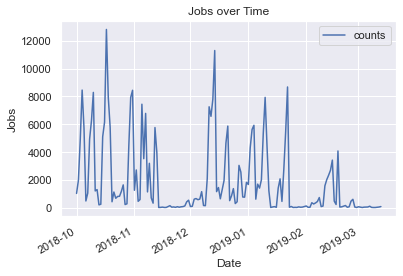

In [768]:
jobsdf = df.dropna(subset=['Date'])
jobsdf = jobsdf.loc[0:, ['Date']]
jobsdf = jobsdf.value_counts().reset_index(name='counts')
jobsdf.set_index('Date').plot(title = "Jobs over Time", xlabel="Date", ylabel="Jobs")

### Relationship between AverageSalary and Job Postings

In [105]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [107]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15.0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,62639,56080,"15,000",62639
35.0,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,23476,22094,"35,000",23476
45.0,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,34436,33585,"45,000",34436
55.0,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,27027,26222,"55,000",27027
65.0,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,28499,27566,"65,000",28499
75.0,28712,28712,27794,28712,17053,10456,17053,17053,28712,27670,28712,28712,27674,"75,000",28712
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27673,27673,27150,27673,17137,10575,17137,17137,27671,26682,27673,27673,26683,"110,000",27673
135.0,24514,24514,24165,24514,14701,9481,14701,14701,24514,23610,24514,24514,23612,"135,000",24514


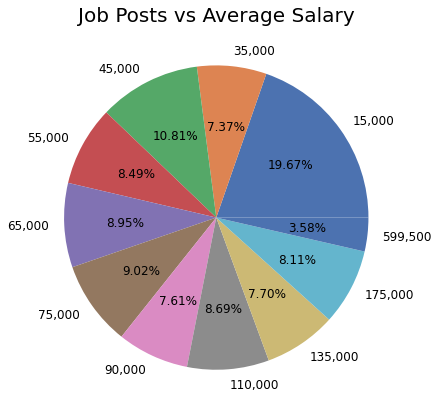

In [114]:
labels = averageSalaryDf["AverageSalary"]
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
colors = sns.color_palette('deep')
plt.pie(data=averageSalaryDf, x=averageSalaryDf.Count, labels=labels, colors=colors, autopct='%0.2f%%', textprops={'fontsize': 12})
plt.title("Job Posts vs Average Salary", size=20);

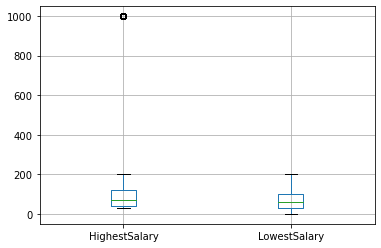

In [173]:
boxplot = df.boxplot(column=['HighestSalary', 'LowestSalary'])

In [175]:
print("Overal average salary: ", df['AverageSalary'].mean())

Overal average salary:  89.37410686599856


Salaries over time


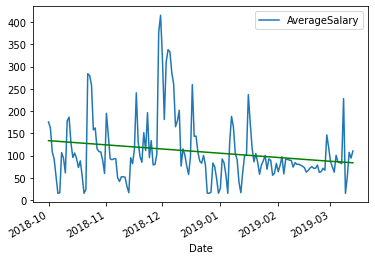

In [185]:
avg_df = df.dropna(subset=['Date', 'AverageSalary'])
avg_df = avg_df.loc[0:, ['Date','AverageSalary']]
avg_df = avg_df.sort_values(by = 'Date')
average_Values = avg_df.groupby(['Date'])['AverageSalary'].mean().values
avg_df = avg_df.drop_duplicates(subset=['Date'])
avg_df['AverageSalary'] = average_Values
avg_df.Date = pd.to_datetime(avg_df.Date)

ax_data = avg_df.plot(x='Date', y='AverageSalary')
x = np.arange(avg_df['Date'].size)
fit = np.polyfit(x, avg_df['AverageSalary'], 1)
fit_fn = np.poly1d(fit)

avg_df.insert(2,'Trend',fit_fn(x))
avg_df.plot(x='Date', y='Trend', color='Green', legend=False,ax=ax_data)
print("Salaries over time")

<AxesSubplot:title={'center':'Locations by their average salary'}, xlabel='Location', ylabel='Average Salary'>

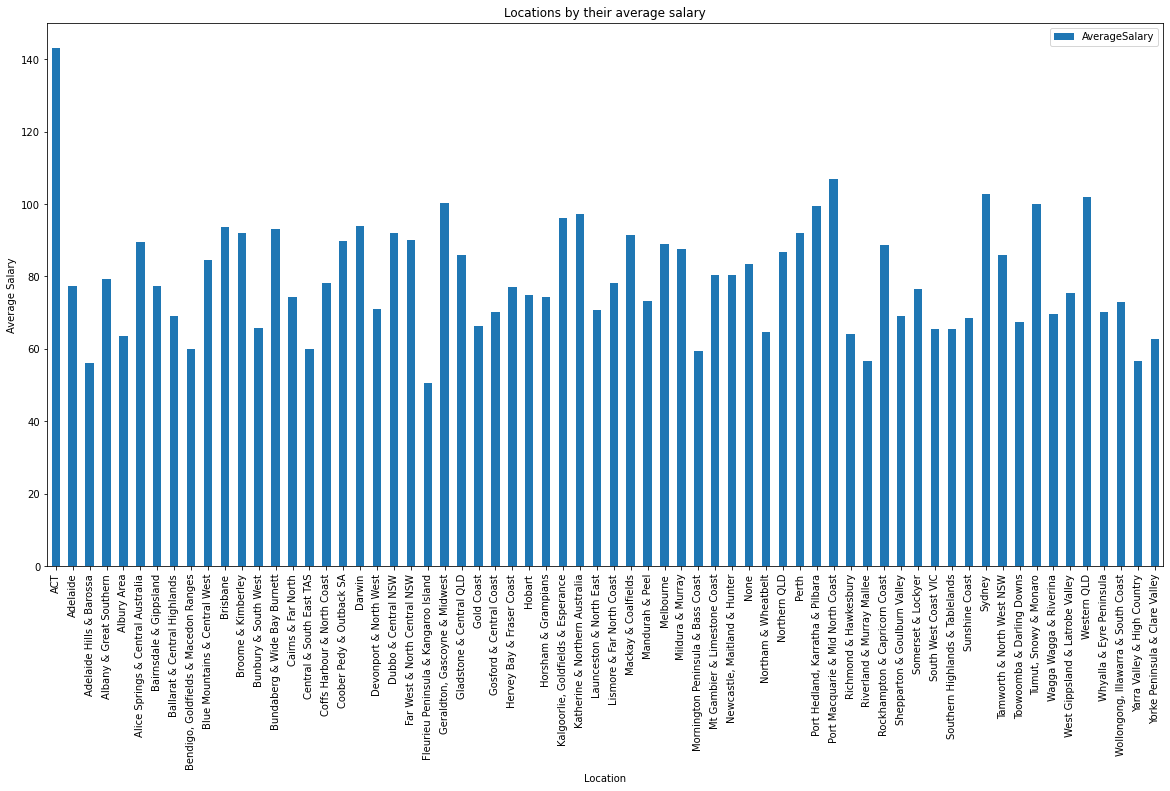

In [323]:
#Locations by their average salary
avg_df =  df.dropna(subset=['Location', 'AverageSalary'])
avg_df =  avg_df.loc[0:, ['Location','AverageSalary']]
avg_df.sort_values(by='AverageSalary', ascending=True)
avg_df.groupby('Location', as_index=False)['AverageSalary'].mean().plot.bar(x='Location', ylabel='Average Salary', 
                                                                        title='Locations by their average salary', rot=90, figsize=(20,10))

### Relationship between job types and the number of jobs

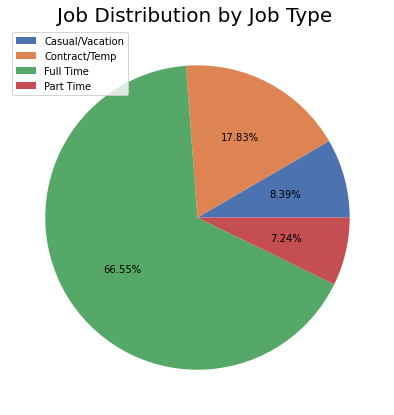

In [161]:
JobType = df.groupby('JobType', as_index=False).count()
JobType['labels'] = JobType['JobType']

colors = sns.color_palette('deep')
fig = plt.figure(figsize=(7, 7))
plt.pie(data=JobType, x=JobType.Id, labels=JobType.labels, colors=colors, 
        autopct='%0.2f%%', textprops={'fontsize': 10}, labeldistance=None)
plt.title("Job Distribution by Job Type ", size=20)
plt.legend(prop={"size":10});

In [192]:
salaries =  df.dropna(subset=['JobType', 'AverageSalary'])
salaries =  salaries.loc[0:, ['JobType','AverageSalary']]
print("Mean salaries for each job type:")
print(salaries.groupby(['JobType'])['AverageSalary'].mean())

Mean salaries for each job type:
JobType
Casual/Vacation     49.245500
Contract/Temp      130.258796
Full Time           88.124203
None                79.166536
Part Time           54.420465
Name: AverageSalary, dtype: float64


### Number of Job postings by Classification and SubClassification

In [200]:
Classificationdf = df.dropna(subset=['Classification', 'SubClassification'])
print("Dataset contains", len(df["Classification"].unique()), "different sectors")
print("These sectors contain", len(df["SubClassification"].unique()), "sub sectors")
count_of_sectors = {}
for x in Classificationdf.groupby(['Classification','SubClassification']).size().reset_index()['Classification']:
    if(x in count_of_sectors):
        count_of_sectors[x] = count_of_sectors[x] + 1
    else:
        count_of_sectors[x] = 1
largest_count_of_sector = 0
largest_Sector = "";
for x in count_of_sectors:
    if(count_of_sectors[x] > largest_count_of_sector):
        largest_count_of_sector = count_of_sectors[x];
        largest_Sector = x;
print(largest_Sector, "has the most subsectors (", largest_count_of_sector, ")")

Dataset contains 31 different sectors
These sectors contain 339 sub sectors
Healthcare & Medical has the most subsectors ( 33 )


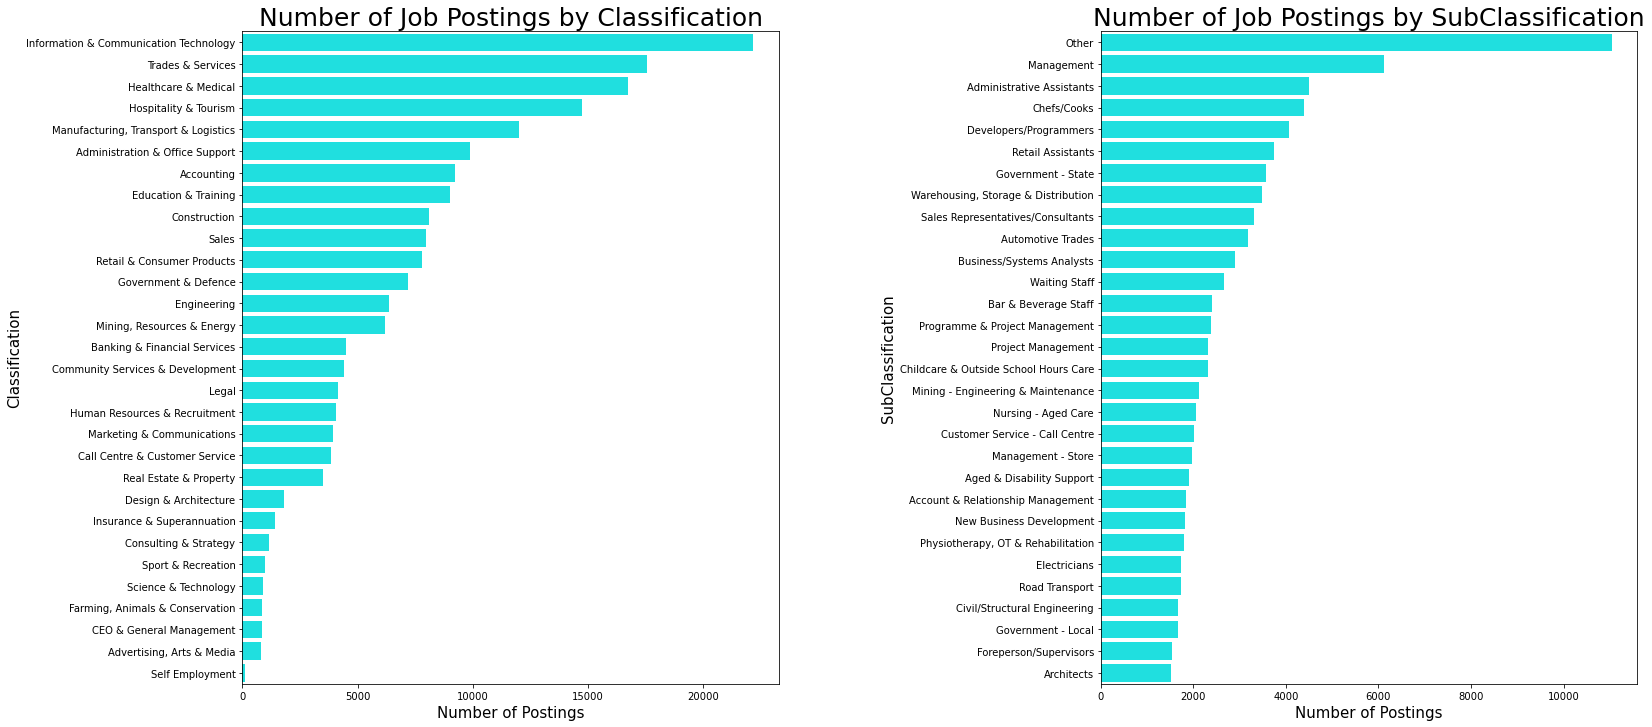

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(25, 12))
classificationDf = df.groupby(['Classification'], as_index = False)['Id'].count().sort_values(by='Id', ascending=False)
subClassificationDf = df.groupby(['SubClassification'], as_index = False)['Id'].count().sort_values(by='Id', ascending=False)
classificationDf.drop(classificationDf.index[0], inplace=True)
subClassificationDf.drop(subClassificationDf.index[0], inplace=True)
subClassificationDf = subClassificationDf[:30]

sns.barplot(ax=ax[0], data=classificationDf, x=classificationDf.Id, y=classificationDf.Classification, color = 'cyan')
sns.barplot(ax=ax[1], data=subClassificationDf, x=subClassificationDf.Id, y=subClassificationDf.SubClassification, color = 'cyan')

ax[0].set_title("Number of Job Postings by Classification", size=25)
ax[0].set_xlabel("Number of Postings", size=15)
ax[0].set_ylabel("Classification", size=15)

ax[1].set_title("Number of Job Postings by SubClassification", size=25)
ax[1].set_xlabel("Number of Postings", size=15)
ax[1].set_ylabel("SubClassification", size=15)

plt.subplots_adjust(wspace=0.6)

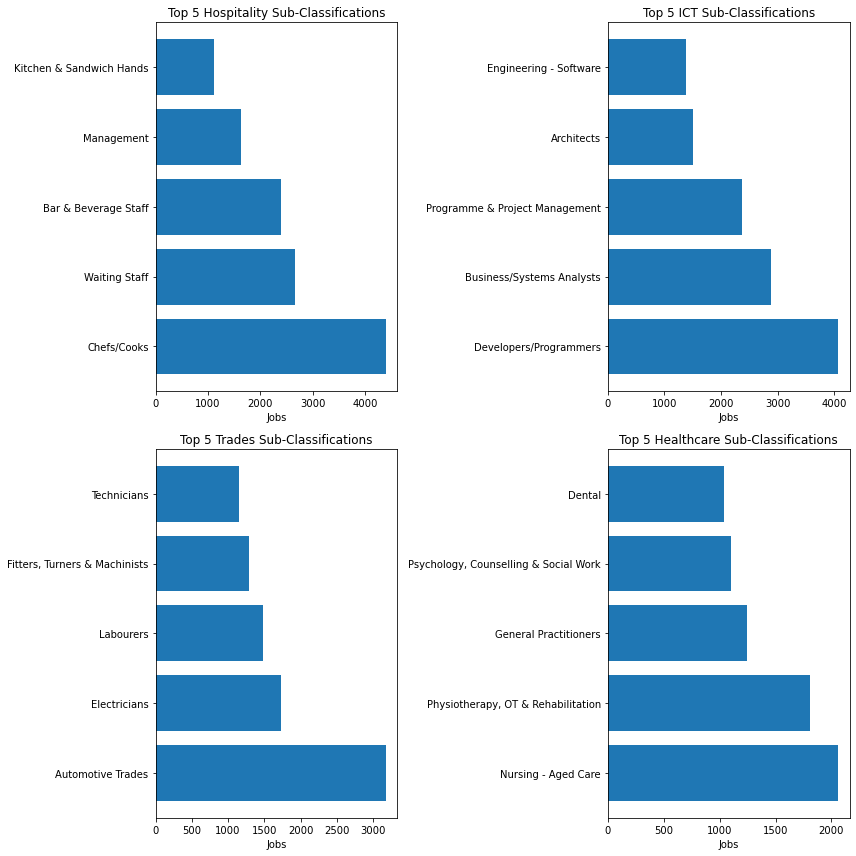

In [255]:
fig = plt.figure(figsize= (12, 12))

Hospitalitydf = df.loc[df['Classification'] == 'Hospitality & Tourism']['SubClassification'].value_counts().nlargest(5)
plt.subplot(2,2,1, title = 'Top 5 Hospitality Sub-Classifications', xlabel = 'Jobs')
plt.barh(Hospitalitydf.keys(), Hospitalitydf)

ICTdf = df.loc[df['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts().nlargest(5)
plt.subplot(2,2,2, title = 'Top 5 ICT Sub-Classifications', xlabel = 'Jobs')
plt.barh(ICTdf.keys(), ICTdf)

Tradesdf = df.loc[df['Classification'] == 'Trades & Services']['SubClassification'].value_counts().nlargest(5)
plt.subplot(2,2,3, title = 'Top 5 Trades Sub-Classifications', xlabel = 'Jobs')
plt.barh(Tradesdf.keys(), Tradesdf)

Healthcaredf = df.loc[df['Classification'] == 'Healthcare & Medical']['SubClassification'].value_counts().nlargest(5)
plt.subplot(2,2,4, title = 'Top 5 Healthcare Sub-Classifications', xlabel = 'Jobs')
plt.barh(Healthcaredf.keys(), Healthcaredf)

plt.tight_layout()

### Market share between cities

In [256]:
print("There is a total of",len(df["Location"].unique()), "locations contained in the dataset" )
Location_table = df["Location"].value_counts()
Location_table.drop(Location_table.index[0], inplace=True)
top_10 = Location_table[0:10]
print("Top 10:")
print(top_10)
print("As seen above the top 6 locations are Capital Cities")

There is a total of 66 locations contained in the dataset
Top 10:
Sydney                          58787
Melbourne                       45290
Brisbane                        21043
Perth                           12958
Adelaide                         6506
ACT                              6114
Newcastle, Maitland & Hunter     3890
Gold Coast                       3518
South West Coast VIC             1758
Mackay & Coalfields              1682
Name: Location, dtype: int64
As seen above the top 6 locations are Capital Cities


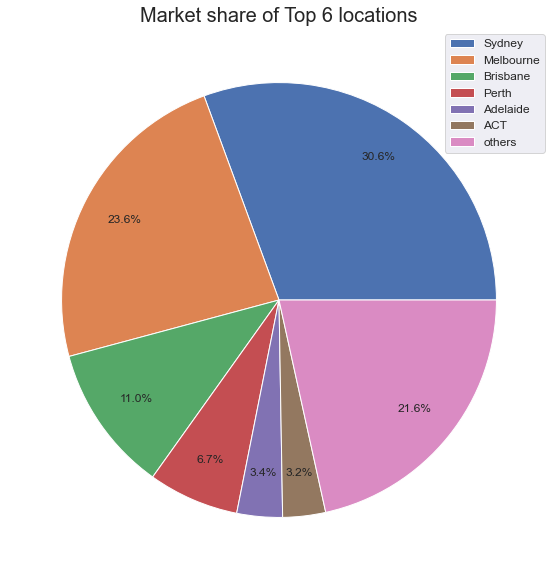

In [767]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf = locationDf.sort_values(by="Count", ascending=False)
locationDf.drop(locationDf.index[0], inplace=True)
top_5 = locationDf[:6].copy()
others = pd.DataFrame(data = {'Location' : ['others'],'Count' : [locationDf['Count'][6:].sum()]})
locationDf = pd.concat([top_5, others])

fig = plt.figure(figsize=(10, 10))
plt.pie(data=locationDf, x=locationDf.Count, labels= locationDf.Location, labeldistance=None, colors=sns.color_palette('deep'), 
        autopct='%0.1f%%', pctdistance=0.8)
plt.legend(prop={"size":12})
plt.title("Market share of Top 6 locations",size=20);

           Count
Sydney     58787
Melbourne  45290
Brisbane   21043
Perth      12958
Adelaide    6506
ACT         6114
Others     41397


<AxesSubplot:title={'center':'Number of Jobs Top 6 locations'}>

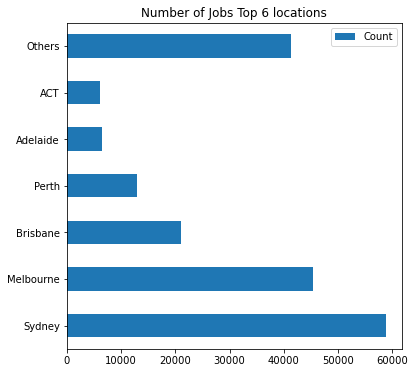

In [300]:
locationDf = locationDf[['Count']]
locationDf = locationDf.rename(index={0:'Others'})
print(locationDf)
locationDf.plot.barh(figsize = (6, 6), title='Number of Jobs Top 6 locations')

<Figure size 1152x864 with 0 Axes>

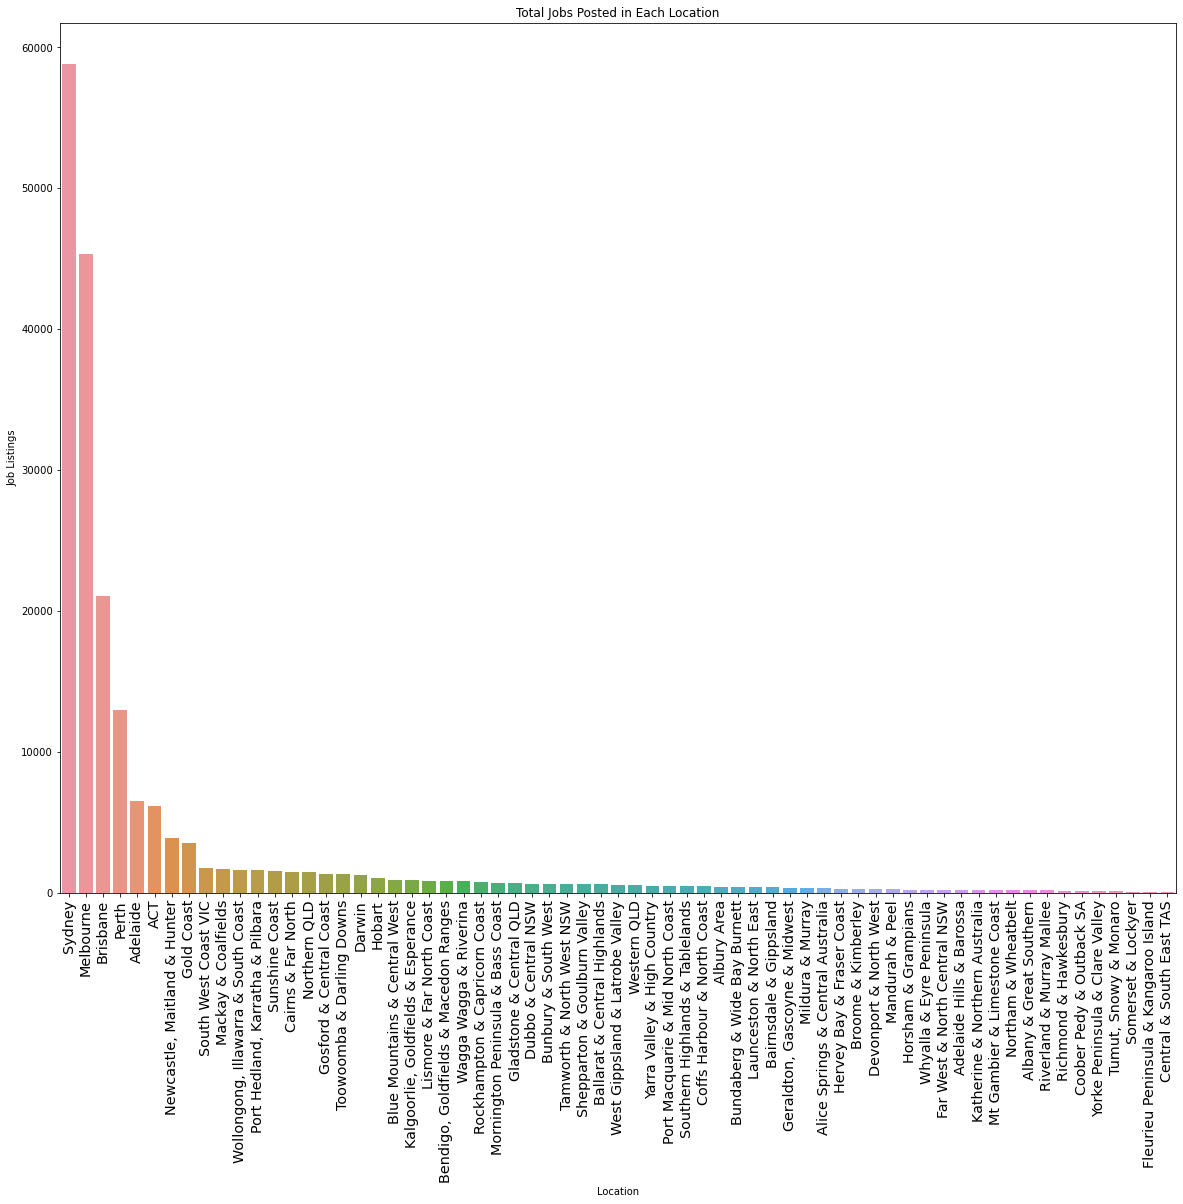

In [311]:
fig= plt.figure(figsize=(16,12))
locationDf = df[df.Location != 'None']
plt.figure(figsize=(20, 16))
ax = sns.countplot(x='Location', data=locationDf, order = locationDf['Location'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontweight='light', fontsize='x-large')
ax.set(ylabel = "Job Listings")
plt.title('Total Jobs Posted in Each Location')
plt.show()

# 2.2) Analysing the Market by locations

In [12]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
ACT,3328,3328,3279,3328,0,3328,3328,3328,2987,3328,3328,2988,3328,ACT,3328
Adelaide,3269,3269,3111,3269,0,3269,3269,3269,3008,3269,3269,3009,3269,Adelaide,3269
Adelaide Hills & Barossa,94,94,90,94,0,94,94,94,84,94,94,84,94,Adelaide Hills & Barossa,94
Albany & Great Southern,77,77,77,77,0,77,77,77,62,77,77,62,77,Albany & Great Southern,77
Albury Area,195,195,189,195,0,195,195,195,187,195,195,187,195,Albury Area,195
Alice Springs & Central Australia,157,157,155,157,0,157,157,157,137,157,157,137,157,Alice Springs & Central Australia,157
Bairnsdale & Gippsland,187,187,185,187,0,187,187,187,174,187,187,174,187,Bairnsdale & Gippsland,187
Ballarat & Central Highlands,259,259,247,259,0,259,259,259,230,259,259,230,259,Ballarat & Central Highlands,259
"Bendigo, Goldfields & Macedon Ranges",387,387,382,387,0,387,387,387,346,387,387,346,387,"Bendigo, Goldfields & Macedon Ranges",387


In [766]:
loc_class =  df.dropna(subset=['Location', 'Classification'])
loc_class =  loc_class.loc[0:, ['Location','Classification']]
loc_class = loc_class.value_counts().reset_index(name='count')
loc_class = loc_class.groupby(['Location','Classification']).agg({'count':sum})

largest_sector = loc_class['count'].groupby('Location', group_keys=False) 
largest_sector = largest_sector.nlargest(1)
print("Largest sector for each location:")
print(largest_sector)

Largest sector for each location:
Location                             Classification                        
ACT                                  Information & Communication Technology    2028
Adelaide                             Trades & Services                          810
Adelaide Hills & Barossa             Hospitality & Tourism                       32
Albany & Great Southern              Healthcare & Medical                        24
Albury Area                          Healthcare & Medical                        89
                                                                               ... 
Western QLD                          Healthcare & Medical                       105
Whyalla & Eyre Peninsula             Trades & Services                           39
Wollongong, Illawarra & South Coast  Healthcare & Medical                       265
Yarra Valley & High Country          Hospitality & Tourism                      132
Yorke Peninsula & Clare Valley       Healthcare & 

### Analysis of the Top 4 locations

## Sydney

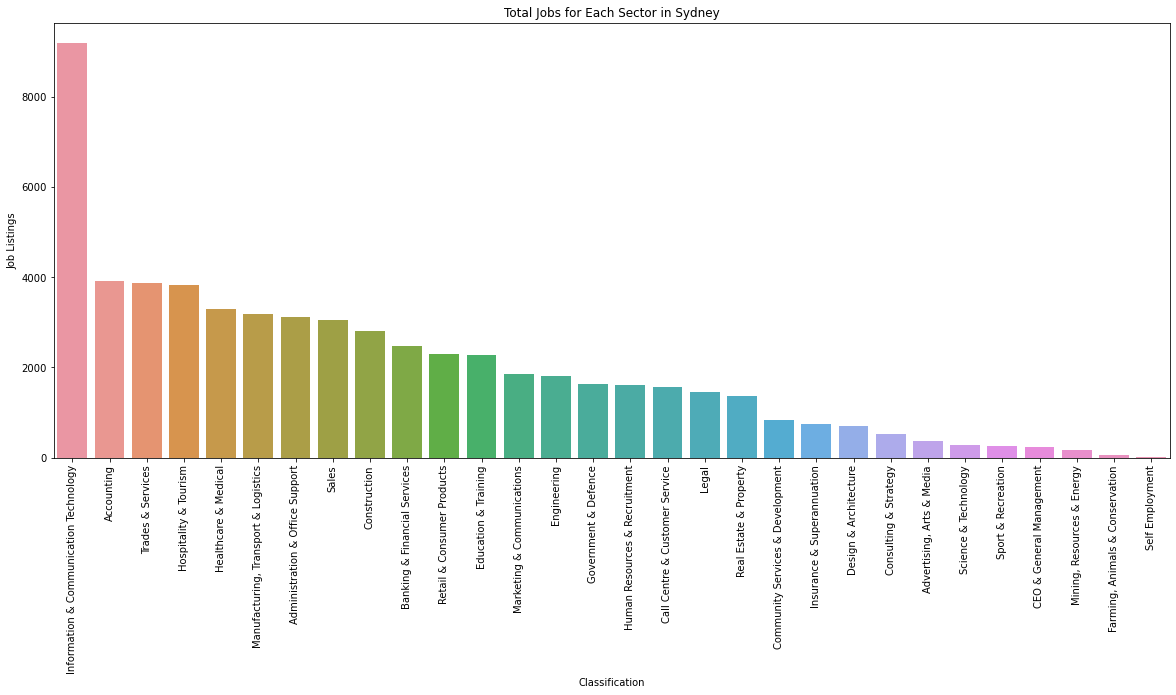

In [359]:
Sydneydf = df[df.Location == 'Sydney']
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='Classification', data=Sydneydf, order = Sydneydf['Classification'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylabel = 'Job Listings')
plt.title('Total Jobs for Each Sector in Sydney')
plt.show()

Text(0.5, 1.0, 'Sydney Market share of Job Classifications')

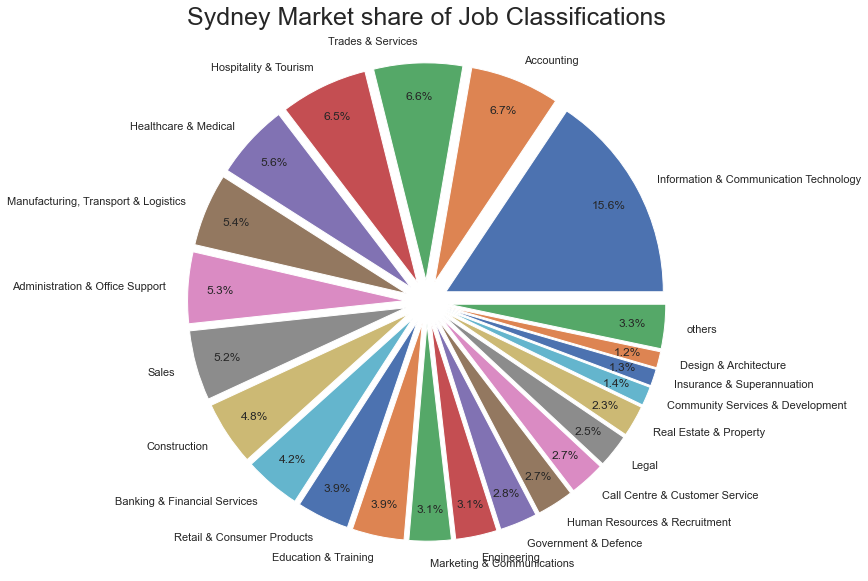

In [773]:
Sydney_Class = Sydneydf.groupby('Classification').count()
Sydney_Class['Classification'] = Sydney_Class.index
Sydney_Class['Count'] = Sydney_Class['Id']
Sydney_Class = Sydney_Class.sort_values(by="Count", ascending=False)
top_22 = Sydney_Class[:22].copy()
others = pd.DataFrame(data = {'Classification' : ['others'],'Count' : [Sydney_Class['Count'][22:].sum()]})
Sydney_Class = pd.concat([top_22, others])
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Sydney_Class, x=Sydney_Class.Count, labels=Sydney_Class.Classification, colors=sns.color_palette('deep'), autopct='%0.1f%%',
        explode=explode, pctdistance=0.85)
plt.title("Sydney Market share of Job Classifications", size=25)

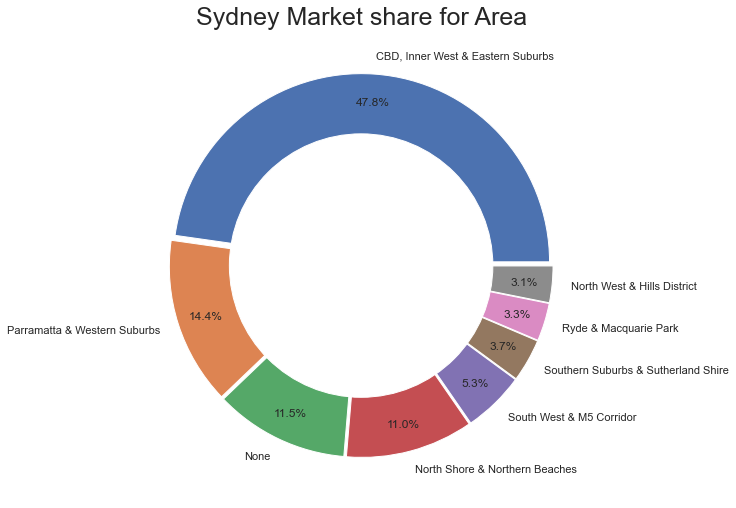

In [761]:
Sydney_Area = Sydneydf.groupby('Area').count()
Sydney_Area['Area'] = Sydney_Area.index
Sydney_Area['Count'] = Sydney_Area['Id']
Sydney_Area = Sydney_Area.sort_values(by="Count", ascending=False)
Sydney_Area = Sydney_Area[:8].copy()
explode = (0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Sydney_Area, x=Sydney_Area.Count, labels=Sydney_Area.Area, colors=sns.color_palette('deep'), autopct='%0.1f%%',
        explode=explode, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Sydney Market share for Area", size=25)
plt.show()

Text(0.5, 1.0, 'Sydney Job Posts by Average Yearly Salary')

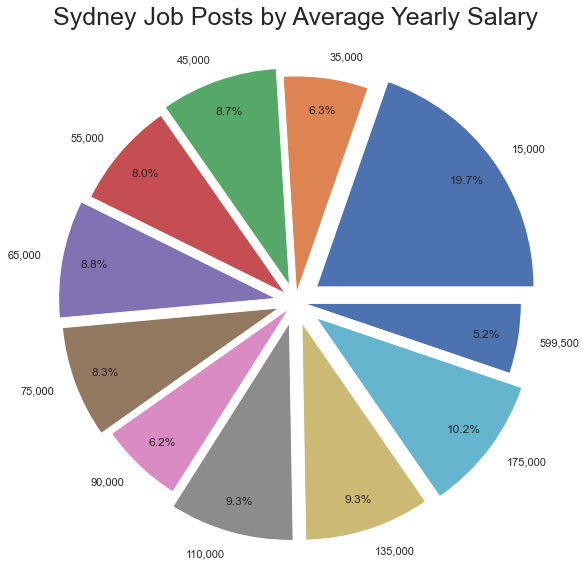

In [772]:
Sydney_AverageSalary = Sydneydf.groupby('AverageSalary').count()
Sydney_AverageSalary['AverageSalary'] = (Sydney_AverageSalary.index*1000).astype(float).map('{:,.0f}'.format)
Sydney_AverageSalary['Count'] = Sydney_AverageSalary['Id']
explode = (0.12,0.04,0.08,0.06,0.09,0.08,0.04,0.1,0.1,0.12,0.04)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Sydney_AverageSalary, x=Sydney_AverageSalary.Id, labels=Sydney_AverageSalary["AverageSalary"], colors=sns.color_palette('deep'), autopct='%0.1f%%',
        explode=explode, pctdistance=0.85)
plt.title("Sydney Job Posts by Average Yearly Salary", size=25)

## Melbourne

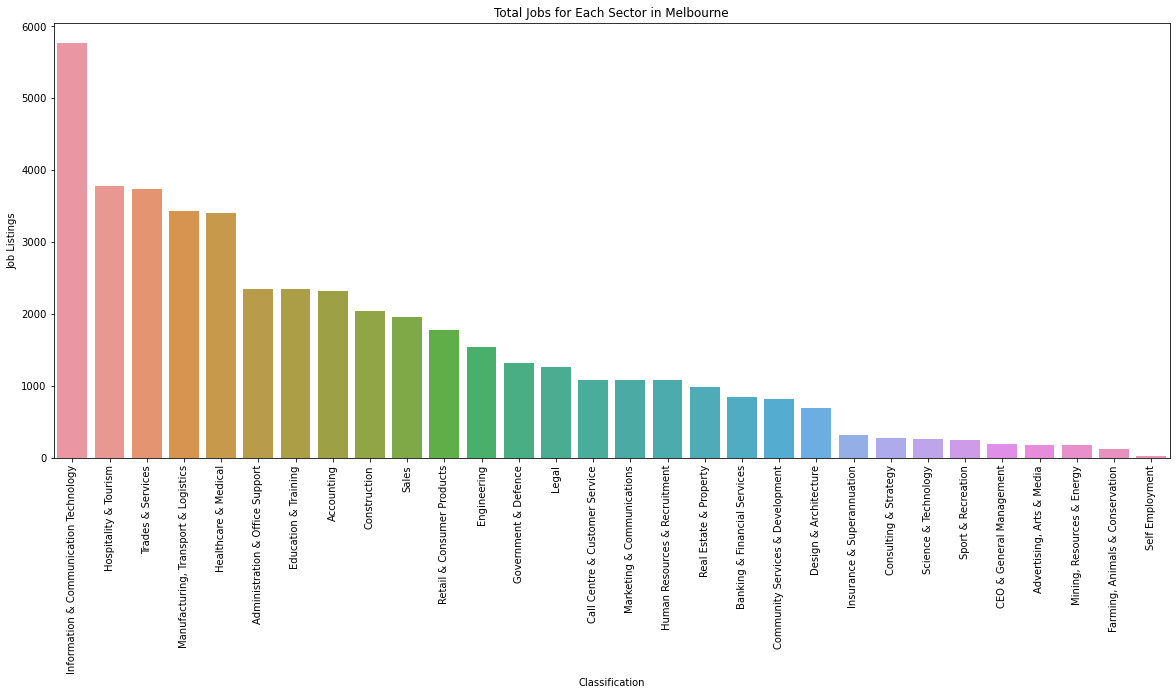

In [447]:
melbournedf = df[df.Location == 'Melbourne']
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='Classification', data=melbournedf, order = melbournedf['Classification'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylabel = 'Job Listings')
plt.title('Total Jobs for Each Sector in Melbourne')
plt.show()

Text(0.5, 1.0, 'Melbourne Market share of Job Classifications')

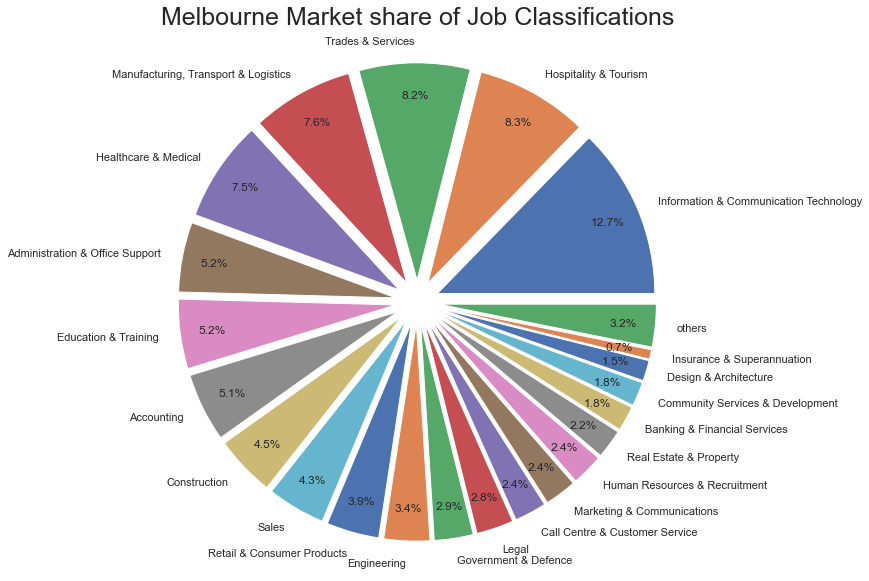

In [763]:
Melbourne_Class = melbournedf.groupby('Classification').count()
Melbourne_Class['Classification'] = Melbourne_Class.index
Melbourne_Class['Count'] = Melbourne_Class['Id']
Melbourne_Class = Melbourne_Class.sort_values(by="Count", ascending=False)
top_22 = Melbourne_Class[:22].copy()
others = pd.DataFrame(data = {'Classification' : ['others'], 'Count' : [Melbourne_Class['Count'][22:].sum()]})
Melbourne_Class = pd.concat([top_22, others])

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Melbourne_Class, x=Melbourne_Class.Count, labels=Melbourne_Class.Classification, colors=sns.color_palette('deep'), autopct='%0.1f%%',
        explode=explode, pctdistance=0.85)
plt.title("Melbourne Market share of Job Classifications", size=25)

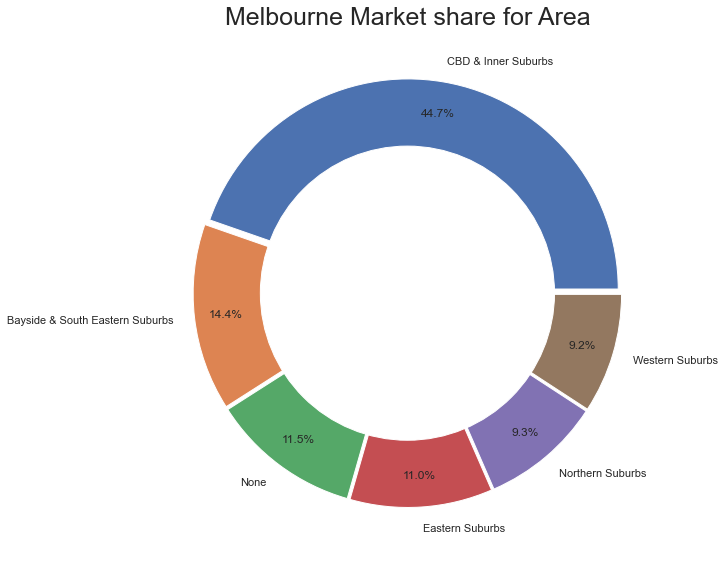

In [759]:
Melbourne_Area = melbournedf.groupby('Area').count()
Melbourne_Area['Area'] = Melbourne_Area.index
Melbourne_Area['Count'] = Melbourne_Area['Id']
Melbourne_Area = Melbourne_Area.sort_values(by="Count", ascending=False)
Melbourne_Area = Melbourne_Area[:6].copy()
explode = (0.02,0.02,0.02,0.02,0.02,0.02)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Melbourne_Area, x=Melbourne_Area.Count, labels=Melbourne_Area.Area, colors=sns.color_palette('deep'), autopct='%0.1f%%',
        explode=explode, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Melbourne Market share for Area", size=25)
plt.show()



Text(0.5, 1.0, 'Melbourne Job Posts by Average Yearly Salary')

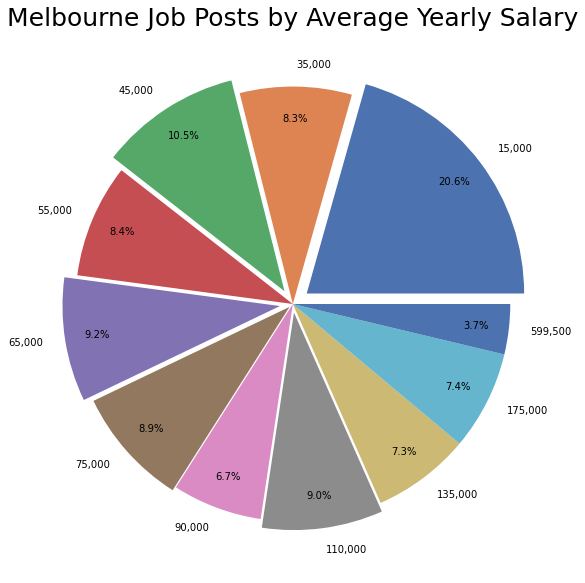

In [463]:
Melbourne_AverageSalary = melbournedf.groupby('AverageSalary').count()
Melbourne_AverageSalary['AverageSalary'] = (Melbourne_AverageSalary.index*1000).astype(float).map('{:,.0f}'.format)
Melbourne_AverageSalary['Count'] = Melbourne_AverageSalary['Id']

explode = (0.08,0.0,0.07,0.0,0.06,0.02,0.0,0.04,0.0,0.0,0.0)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Melbourne_AverageSalary, x=Melbourne_AverageSalary.Id, labels=Melbourne_AverageSalary["AverageSalary"], colors=sns.color_palette('deep'), 
        autopct='%0.1f%%', explode=explode, pctdistance=0.85)
plt.title("Melbourne Job Posts by Average Yearly Salary", size=25)

## Brisbane

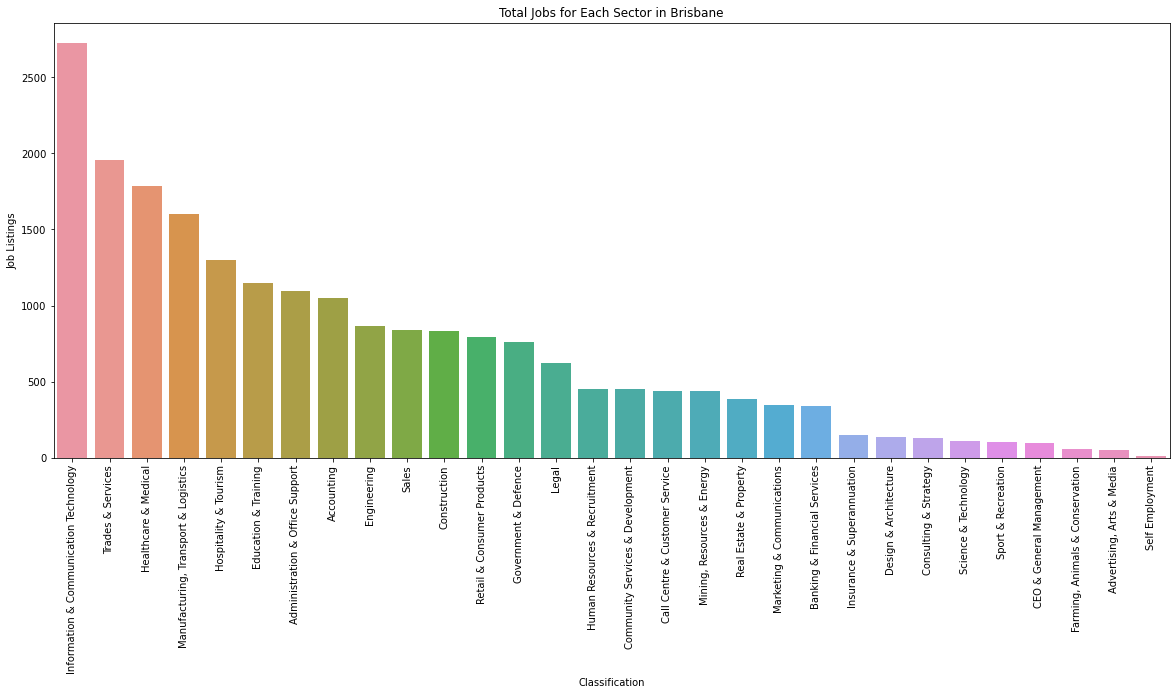

In [465]:
Brisbanedf = df[df.Location == 'Brisbane']
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='Classification', data=Brisbanedf, order = Brisbanedf['Classification'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylabel = 'Job Listings')
plt.title('Total Jobs for Each Sector in Brisbane')
plt.show()

Text(0.5, 1.0, 'Brisbane Market share of Job Classifications')

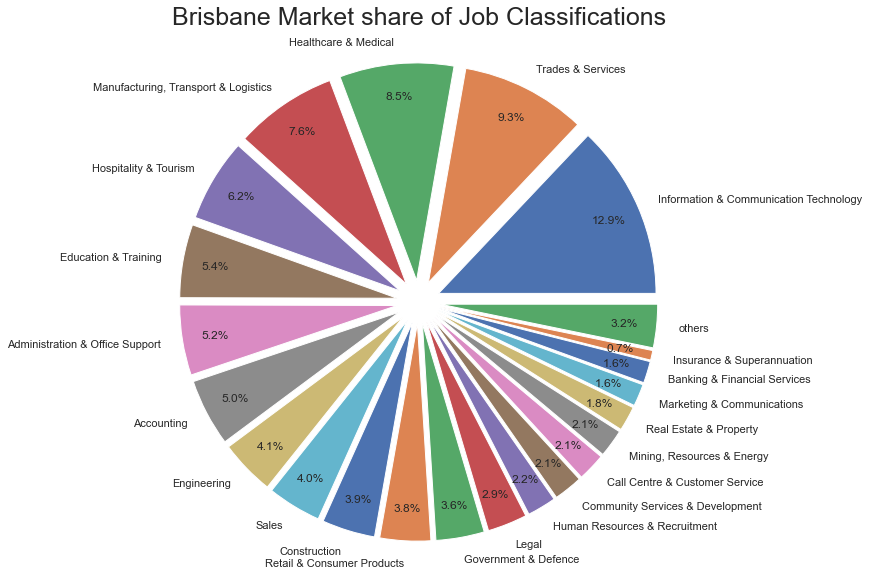

In [764]:
Brisbane_Class = Brisbanedf.groupby('Classification').count()
Brisbane_Class['Classification'] = Brisbane_Class.index
Brisbane_Class['Count'] = Brisbane_Class['Id']
Brisbane_Class = Brisbane_Class.sort_values(by="Count", ascending=False)
top_22 = Brisbane_Class[:22].copy()
others = pd.DataFrame(data = {'Classification' : ['others'], 'Count' : [Brisbane_Class['Count'][22:].sum()]})
Brisbane_Class = pd.concat([top_22, others])

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Brisbane_Class, x=Brisbane_Class.Count, labels=Brisbane_Class.Classification, colors=sns.color_palette('deep'), autopct='%0.1f%%',
        explode=explode, pctdistance=0.85)
plt.title("Brisbane Market share of Job Classifications", size=25)

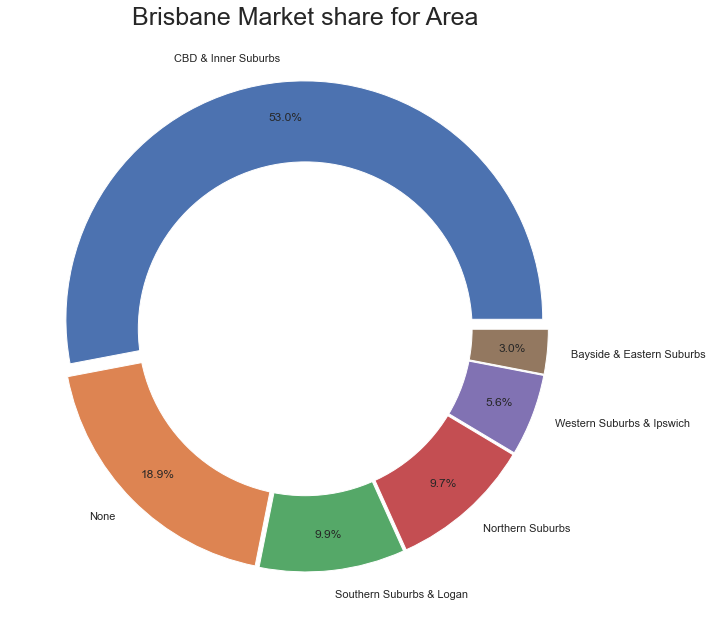

In [757]:
Brisbane_Area = Brisbanedf.groupby('Area').count()
Brisbane_Area['Area'] = Brisbane_Area.index
Brisbane_Area['Count'] = Brisbane_Area['Id']
Brisbane_Area = Brisbane_Area.sort_values(by="Count", ascending=False)
Brisbane_Area = Brisbane_Area[:6].copy()
explode = (0.04,0.02,0.02,0.02,0.02,0.02)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Brisbane_Area, x=Brisbane_Area.Count, labels=Brisbane_Area.Area, colors=sns.color_palette('deep'), autopct='%0.1f%%',
        explode=explode, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Brisbane Market share for Area", size=25)
plt.show()


Text(0.5, 1.0, 'Melbourne Job Posts by Average Yearly Salary')

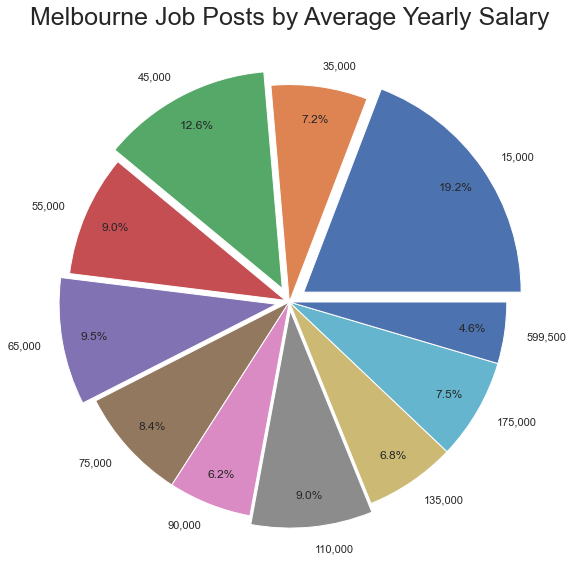

In [756]:
Brisbane_AverageSalary = Brisbanedf.groupby('AverageSalary').count()
Brisbane_AverageSalary['AverageSalary'] = (Brisbane_AverageSalary.index*1000).astype(float).map('{:,.0f}'.format)
Brisbane_AverageSalary['Count'] = Brisbane_AverageSalary['Id']

explode = (0.08,0.0,0.07,0.02,0.06,0.0,0.0,0.04,0.0,0.0,0.0)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Brisbane_AverageSalary, x=Brisbane_AverageSalary.Id, labels=Brisbane_AverageSalary["AverageSalary"], 
        colors=sns.color_palette('deep'), autopct='%0.1f%%', explode=explode, pctdistance=0.85)
plt.title("Melbourne Job Posts by Average Yearly Salary", size=25)

## Perth

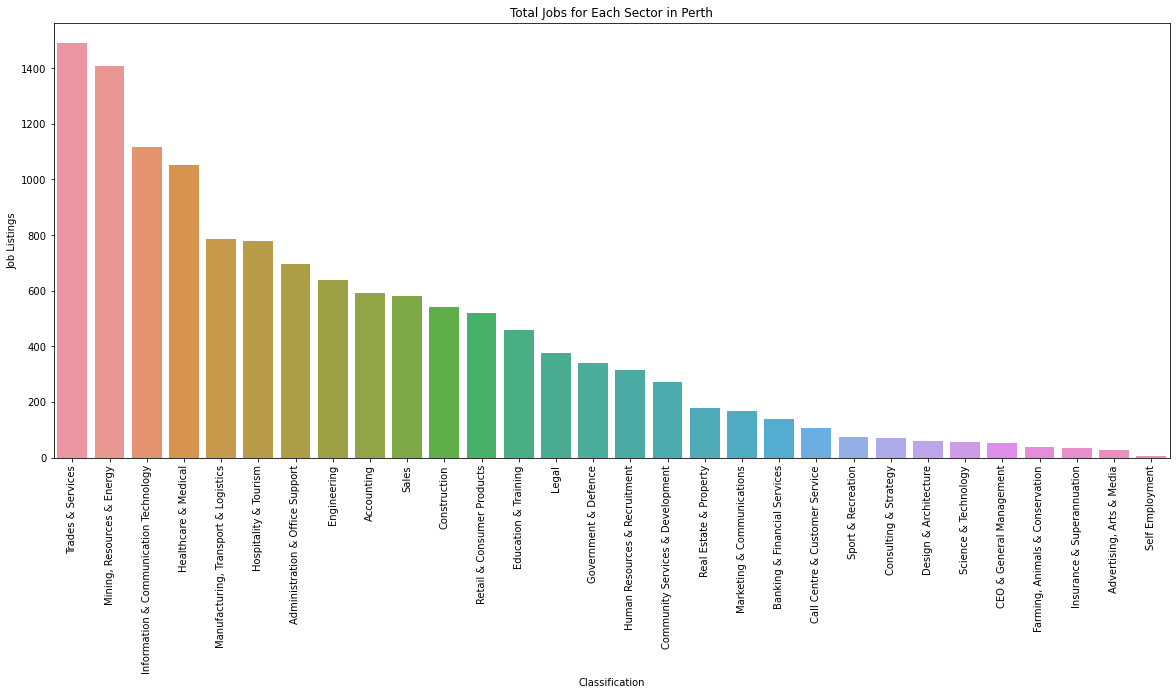

In [501]:
Perthdf = df[df.Location == 'Perth']
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='Classification', data=Perthdf, order = Perthdf['Classification'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylabel = 'Job Listings')
plt.title('Total Jobs for Each Sector in Perth')
plt.show()

Text(0.5, 1.0, 'Perth Market share of Job Classifications')

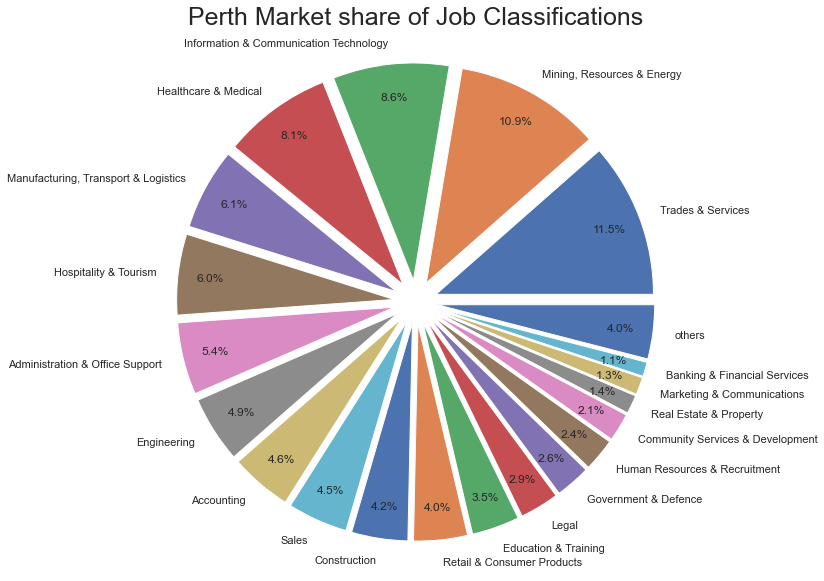

In [771]:
Perth_Class = Perthdf.groupby('Classification').count()
Perth_Class['Classification'] = Perth_Class.index
Perth_Class['Count'] = Perth_Class['Id']
Perth_Class = Perth_Class.sort_values(by="Count", ascending=False)
top_20 = Perth_Class[:20].copy()
others = pd.DataFrame(data = {'Classification' : ['others'], 'Count' : [Perth_Class['Count'][20:].sum()]})
Perth_Class = pd.concat([top_20, others])

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
fig = plt.figure(figsize=(10, 10))
plt.pie(data=Perth_Class, x=Perth_Class.Count, labels=Perth_Class.Classification, colors=sns.color_palette('deep'), autopct='%0.1f%%',
        explode=explode, pctdistance=0.85)
plt.title("Perth Market share of Job Classifications", size=25)

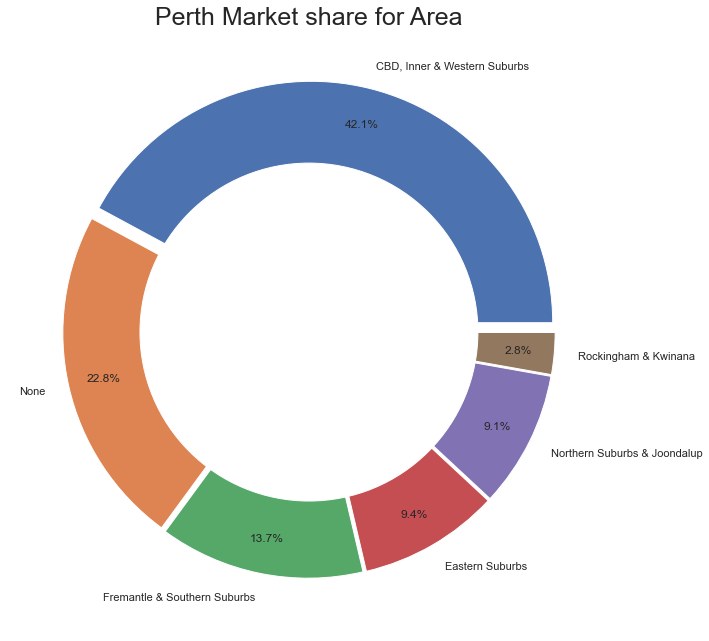

In [770]:
Perth_Area = Perthdf.groupby('Area').count()
Perth_Area['Area'] = Perth_Area.index
Perth_Area['Count'] = Perth_Area['Id']
Perth_Area = Perth_Area.sort_values(by="Count", ascending=False)
Perth_Area = Perth_Area[:6].copy()
explode = (0.04,0.02,0.02,0.02,0.02,0.02)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Perth_Area, x=Perth_Area.Count, labels=Perth_Area.Area, colors=sns.color_palette('deep'), autopct='%0.1f%%',
        explode=explode, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Perth Market share for Area", size=25)
plt.show()

Text(0.5, 1.0, 'Perth Job Posts by Average Yearly Salary')

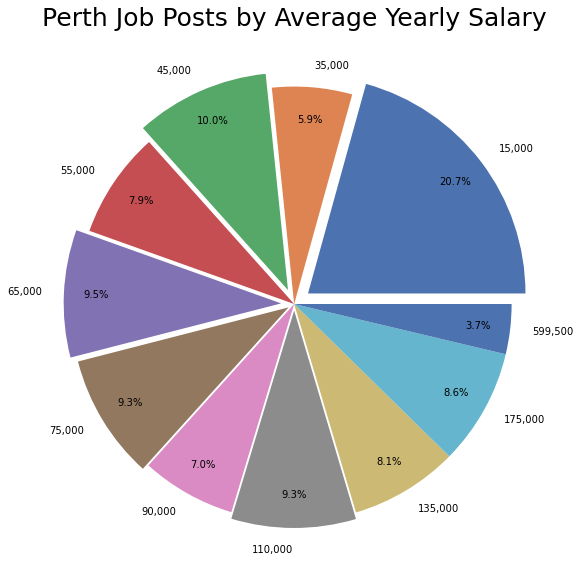

In [509]:
Perth_AverageSalary = Perthdf.groupby('AverageSalary').count()
Perth_AverageSalary['AverageSalary'] = (Perth_AverageSalary.index*1000).astype(float).map('{:,.0f}'.format)
Perth_AverageSalary['Count'] = Perth_AverageSalary['Id']

explode = (0.08,0.0,0.07,0.0,0.06,0.03,0.0,0.03,0.0,0.0,0.0)

fig = plt.figure(figsize=(10, 10))
plt.pie(data=Perth_AverageSalary, x=Perth_AverageSalary.Id, labels=Perth_AverageSalary["AverageSalary"], colors=sns.color_palette('deep'), 
        autopct='%0.1f%%', explode=explode, pctdistance=0.85)
plt.title("Perth Job Posts by Average Yearly Salary", size=25)

### Hottest Job Sectors for Top 4 locations

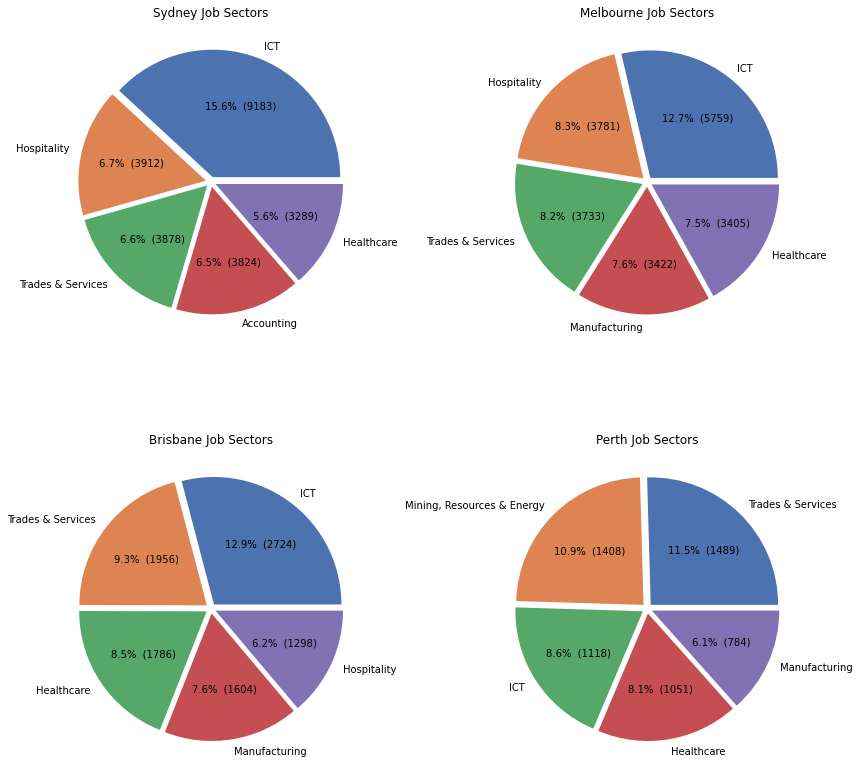

In [543]:
fig = plt.figure(figsize= (12, 12))

def get_autopct(Sector, locationCounts):
    global i
    x = Sector[i]
    percent = (Sector[i] / locationCounts) * 100
    i = i + 1
    return '{:.1f}%  ({:d})'.format(percent, x)

explode = (0.04,0.04,0.04,0.04,0.04)
i = 0
Sydney_Sector = df.loc[df['Location'] == 'Sydney']['Classification'].value_counts().nlargest(5)
plt.subplot(2,2,1, title = 'Sydney Job Sectors')
plt.pie(Sydney_Sector, labels = ['ICT', 'Hospitality', 'Trades & Services', 'Accounting', 'Healthcare'], 
        autopct=lambda pct: get_autopct(Sydney_Sector, locationCounts['Sydney']), 
        explode=explode, colors = sns.color_palette('deep'))
i = 0

Melbourne_Sector = df.loc[df['Location'] == 'Melbourne']['Classification'].value_counts().nlargest(5)
plt.subplot(2,2,2, title = 'Melbourne Job Sectors')
plt.pie(Melbourne_Sector, labels = ['ICT', 'Hospitality', 'Trades & Services', 'Manufacturing', 'Healthcare'], 
        autopct=lambda pct: get_autopct(Melbourne_Sector, locationCounts['Melbourne']), 
        explode=explode, colors = sns.color_palette('deep'))
i = 0
Brisbane_Sector = df.loc[df['Location'] == 'Brisbane']['Classification'].value_counts().nlargest(5)
plt.subplot(2,2,3, title = 'Brisbane Job Sectors')
plt.pie(Brisbane_Sector, labels = ['ICT', 'Trades & Services', 'Healthcare', 'Manufacturing', 'Hospitality'], 
        autopct=lambda pct: get_autopct(Brisbane_Sector, locationCounts['Brisbane']), 
        explode=explode, colors = sns.color_palette('deep'))
i = 0

Perth_Sector = df.loc[df['Location'] == 'Perth']['Classification'].value_counts().nlargest(5)
plt.subplot(2,2,4, title = 'Perth Job Sectors')
plt.pie(Perth_Sector, labels = ['Trades & Services', 'Mining, Resources & Energy', 'ICT', 'Healthcare', 'Manufacturing'], 
        autopct=lambda pct: get_autopct(Perth_Sector, locationCounts['Perth'],), 
        explode=explode, colors = sns.color_palette('deep'))

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

### Range of Salaries for each city

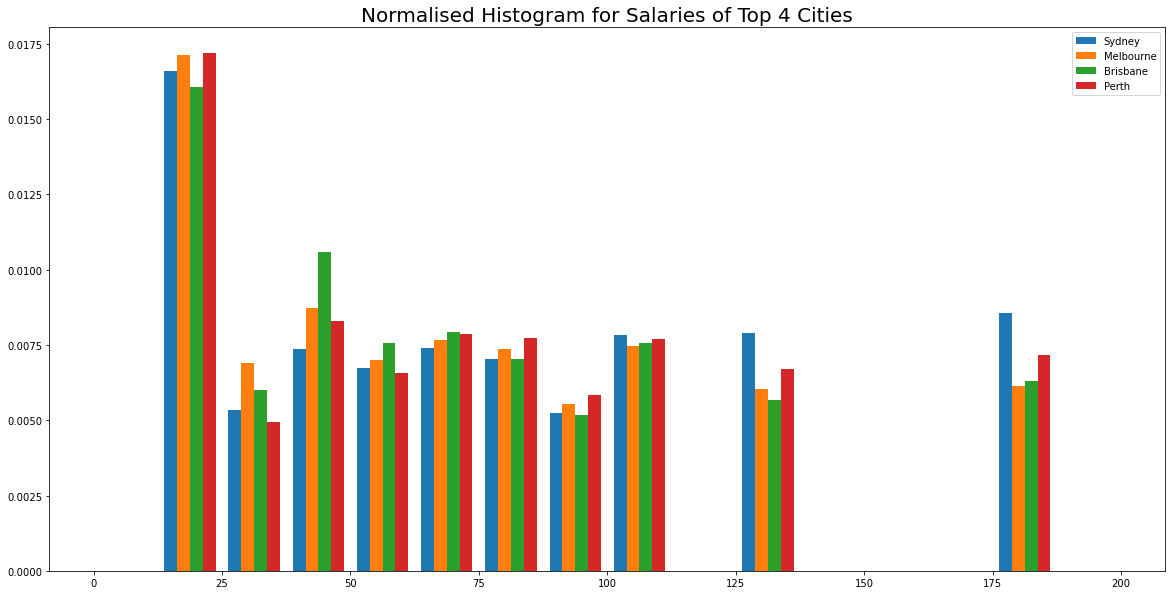

In [560]:
Perth_Salary = df.loc[df['Location'] == 'Perth']['AverageSalary']
Melbourne_Salary = df.loc[df['Location'] == 'Melbourne']['AverageSalary']
Brisbane_Salary = df.loc[df['Location'] == 'Brisbane']['AverageSalary']
Sydney_Salary = df.loc[df['Location'] == 'Sydney']['AverageSalary']
Salary_data = [Sydney_Salary, Melbourne_Salary, Brisbane_Salary, Perth_Salary]

plt.figure(figsize=(20,10))
plt.hist(Salary_data, bins = 16, range = (0, 200), stacked = False, density = 1)
plt.title('Normalised Histogram for Salaries of Top 4 Cities', size=20)
plt.legend(['Sydney', 'Melbourne', 'Brisbane', 'Perth'])

plt.show()

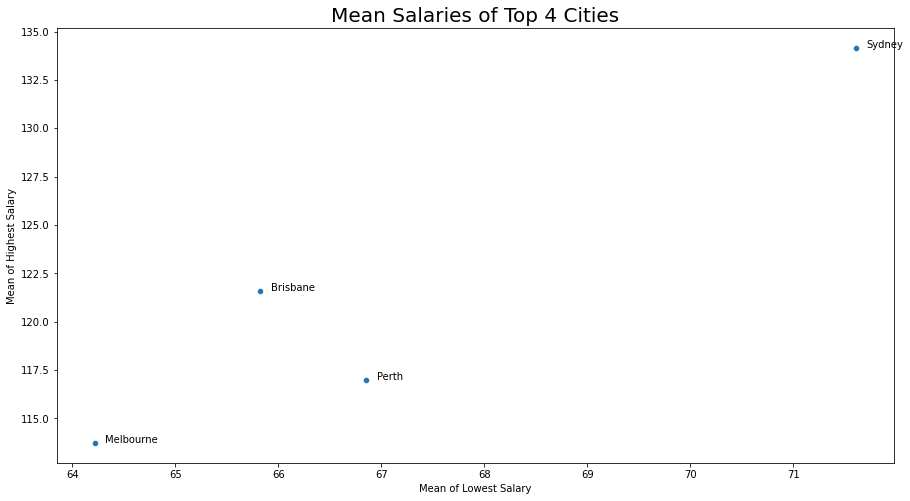

In [636]:
Perth_low = Perthdf["LowestSalary"].mean()
Perth_high = Perthdf["HighestSalary"].mean()
Melbourne_low = melbournedf["LowestSalary"].mean()
Melbourne_high = melbournedf["HighestSalary"].mean()
Sydney_low = Sydneydf["LowestSalary"].mean()
Sydney_high = Sydneydf["HighestSalary"].mean()
Brisbane_low = Brisbanedf["LowestSalary"].mean()
Brisbane_high = Brisbanedf["HighestSalary"].mean()
cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth']
low = [Sydney_low, Melbourne_low, Brisbane_low, Perth_low]
high = [Sydney_high, Melbourne_high, Brisbane_high, Perth_high]

plt.figure(figsize=(15, 8))
ax = sns.scatterplot(x = low, y = high)

for i in range(len(cities)):
    ax.text(low[i]+0.1, high[i], cities[i])

plt.title('Mean Salaries of Top 4 Cities', size=20)
plt.xlabel('Mean of Lowest Salary')
plt.ylabel('Mean of Highest Salary')
plt.show()

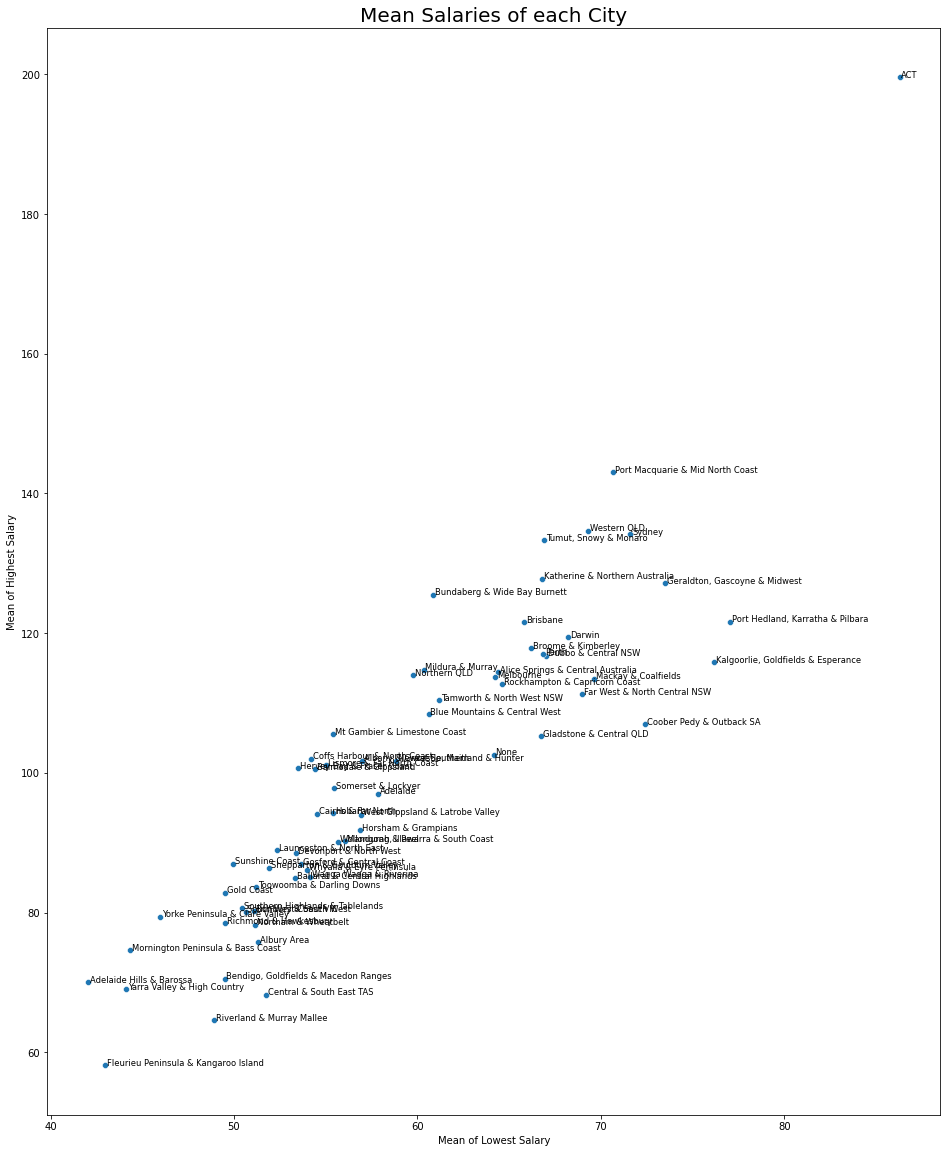

In [676]:
location = df.groupby('Location')
locations = []
LowestSalary_means = []
HighestSalary_means = []

for loc, row in location:
    HighestSalary_means.append(row['HighestSalary'].mean())
    LowestSalary_means.append(row['LowestSalary'].mean())
    locations.append(loc)

plt.figure(figsize=(16, 20))
ax = sns.scatterplot(x = LowestSalary_means, y = HighestSalary_means)

for i in range(len(locations)):
    ax.text(LowestSalary_means[i]+0.1, HighestSalary_means[i], locations[i], horizontalalignment='left', size='small')

plt.title('Mean Salaries of each City', size=20)
plt.xlabel('Mean of Lowest Salary')
plt.ylabel('Mean of Highest Salary')
plt.show()

# 2.3) Analysing the Market by sectors

### Number of postings for each sector

In [561]:
print("The top 10 sectors: ")
values = df["Classification"].value_counts()
top_10 = values[0:10]
print(top_10, "\n")

The top 10 sectors: 
None                                      111051
Information & Communication Technology     22182
Trades & Services                          17545
Healthcare & Medical                       16721
Hospitality & Tourism                      14752
Manufacturing, Transport & Logistics       11994
Administration & Office Support             9882
Accounting                                  9220
Education & Training                        9026
Construction                                8116
Name: Classification, dtype: int64 



<AxesSubplot:title={'center':'Market Share of Sectors'}, ylabel='Classification'>

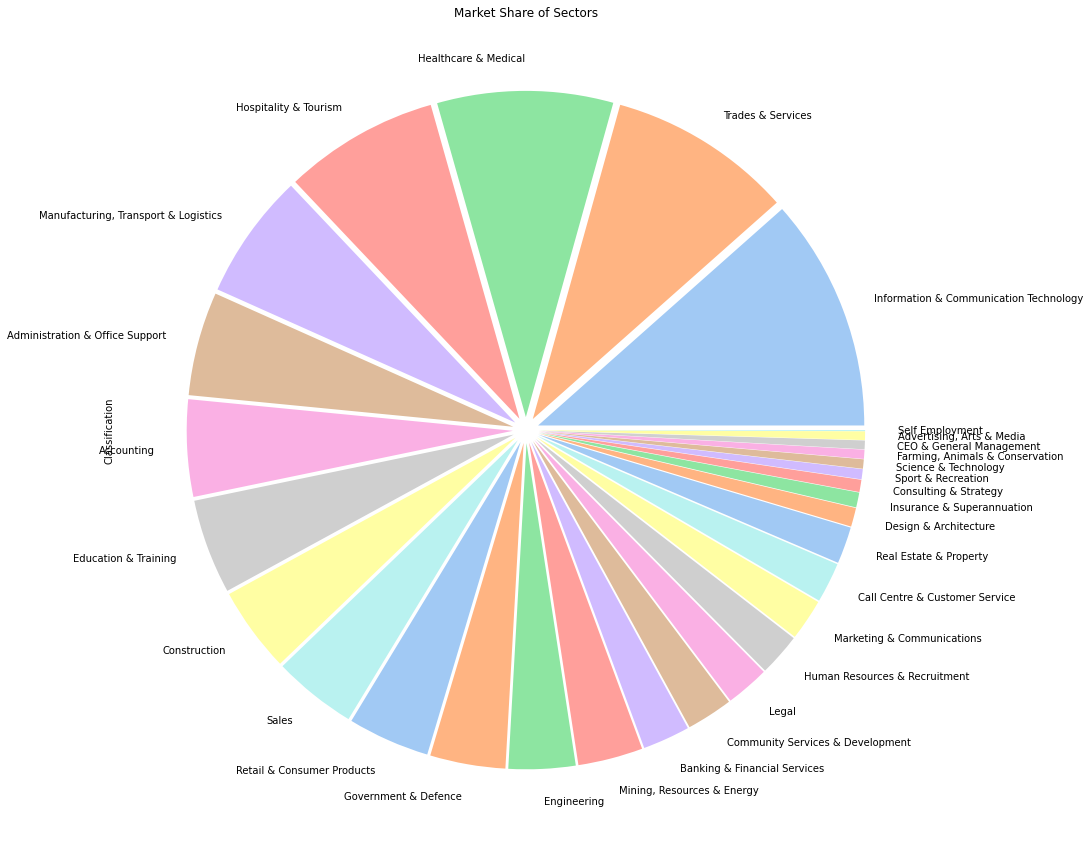

In [602]:
sectors = df.dropna(subset=['Classification'])
sectors = sectors.loc[0:, ['Classification']]
sectors = sectors[sectors.Classification != "None"]
counts = sectors["Classification"].value_counts()
explode = (0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,
           0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04)
counts.plot.pie(y=' ', title="Market Share of Sectors", figsize=(15, 15), colors = sns.color_palette('pastel'), explode=explode)

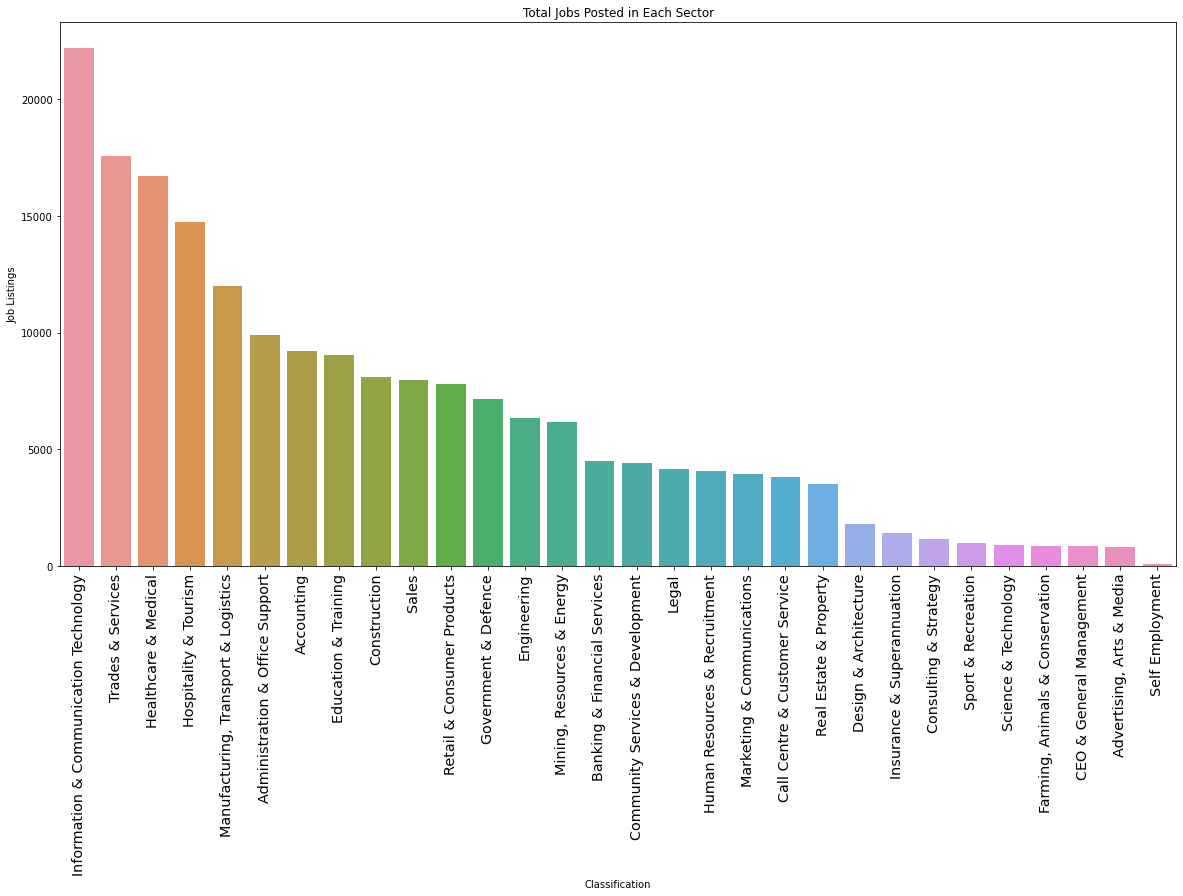

In [606]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Classification', data=sectors, order = counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize='x-large')
ax.set(ylabel = "Job Listings")
plt.title('Total Jobs Posted in Each Sector')
plt.show()

### Salaries for each Sector

In [580]:
Highest_Pay = df.dropna(subset=['Classification', 'AverageSalary'])
Highest_Pay =  Highest_Pay.loc[0:, ['Classification','AverageSalary']]
print("Highest paying sector:\n")
for index, row in Highest_Pay.groupby('Classification', as_index=False)['AverageSalary'].mean().sort_values(by=['AverageSalary'], ascending=False).iterrows():
    print(row['Classification'], "average wage: " ,row['AverageSalary'])

Highest paying sector:

CEO & General Management average wage:  254.23800959232614
Information & Communication Technology average wage:  181.97513749887295
Consulting & Strategy average wage:  152.55841924398626
Mining, Resources & Energy average wage:  128.57120868438108
Construction average wage:  125.54096845736817
Legal average wage:  121.32042594385285
Engineering average wage:  120.72649976381672
Healthcare & Medical average wage:  116.9413312600921
Banking & Financial Services average wage:  110.24699866607381
Government & Defence average wage:  103.66503838101885
Science & Technology average wage:  100.31762065095398
Self Employment average wage:  91.38709677419355
Human Resources & Recruitment average wage:  89.64011327259296
Design & Architecture average wage:  89.25641741071429
Accounting average wage:  87.17640997830803
Insurance & Superannuation average wage:  85.9415081042988
Marketing & Communications average wage:  84.43684879288438
None average wage:  83.37962737841173

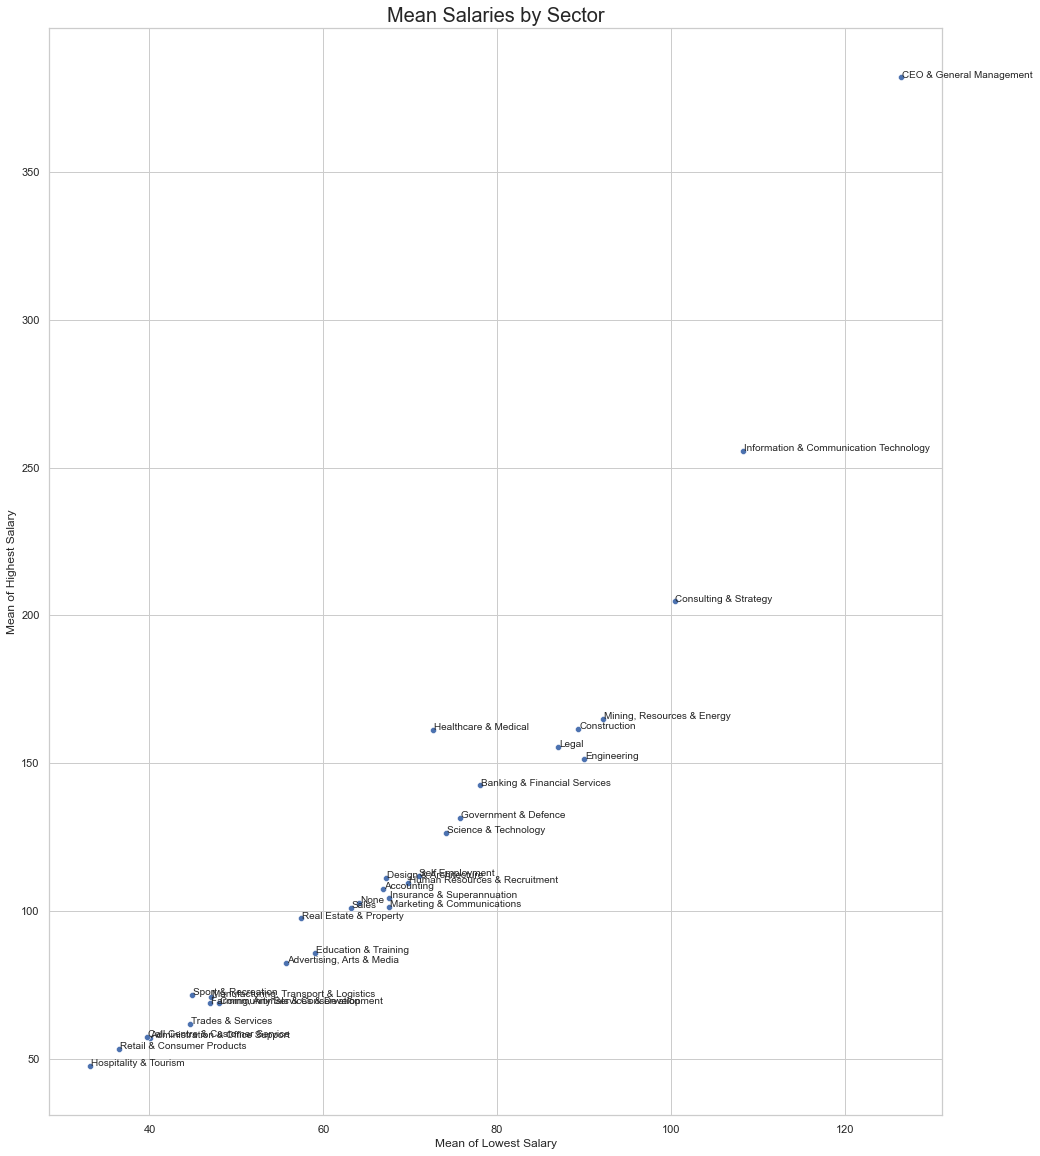

In [736]:
Classification = df.groupby('Classification')
Sectors = []
LowestSalary_means = []
HighestSalary_means = []

for Sector, row in Classification:
    HighestSalary_means.append(row['HighestSalary'].mean())
    LowestSalary_means.append(row['LowestSalary'].mean())
    Sectors.append(Sector)

plt.figure(figsize=(16, 20))
sns.set_style("whitegrid")
ax = sns.scatterplot(x = LowestSalary_means, y = HighestSalary_means)

for i in range(len(Sectors)):
    ax.text(LowestSalary_means[i]+0.1, HighestSalary_means[i], Sectors[i], horizontalalignment='left', size='small')

plt.title('Mean Salaries by Sector', size=20)
plt.xlabel('Mean of Lowest Salary')
plt.ylabel('Mean of Highest Salary')
plt.show()

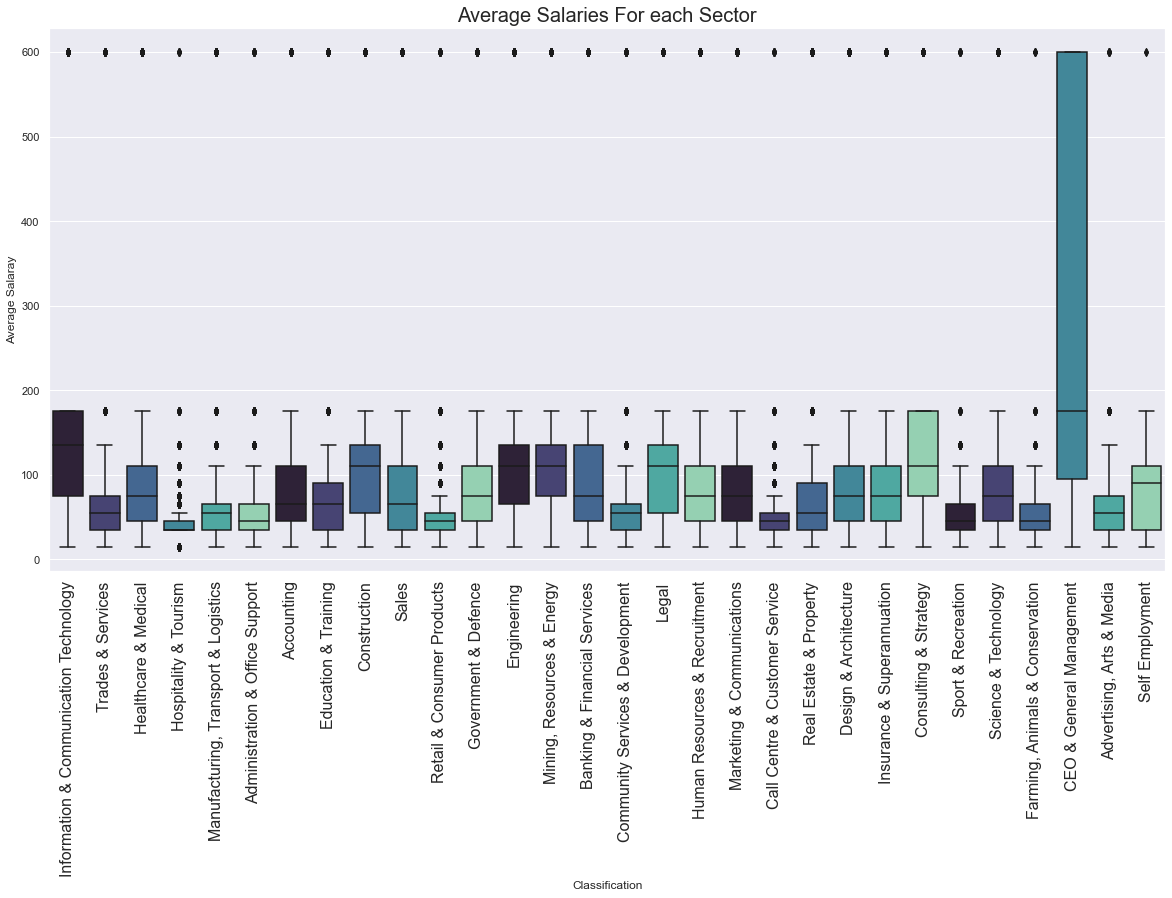

In [749]:
Sectors = df[df["Classification"].isna() == False]
Sectors = Sectors.groupby('Classification').count()
Sectors["Classification"] = Sectors.index
Sectors["Count"] = Sectors["Id"]
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="Classification", y="AverageSalary", order=classificationDf["Classification"], palette=sns.color_palette("mako"))
plt.title("Average Salaries For each Sector", size=20)
plt.xlabel("Classification")
plt.ylabel("Average Salaray")
plt.xticks(rotation=90, size=16)
plt.show()

### Salaries of Sub-sectors

In [643]:
#Find the highest paying subclassification in each classification
Highest_Paying =  df.dropna(subset=['Classification', 'AverageSalary'])
Highest_Paying =  Highest_Paying.loc[0:, ['Classification','SubClassification','AverageSalary']]
Highest_Paying = Highest_Paying.groupby(['Classification','SubClassification']).mean()
Highest_Paying = Highest_Paying['AverageSalary'].groupby('Classification', group_keys=False) 
Highest_Paying = Highest_Paying.nlargest(1)
print("Highest paying Sub-sectors within a Sector:\n")
print(Highest_Paying)

Highest paying Sub-sectors within a Sector:

Classification                          SubClassification                             
Accounting                              Company Secretaries                               237.388889
Administration & Office Support         Contracts Administration                           69.704082
Advertising, Arts & Media               Management                                        143.773810
Banking & Financial Services            Corporate Finance & Investment Banking            201.780000
CEO & General Management                COO & MD                                          343.392157
Call Centre & Customer Service          Management & Support                               75.204545
Community Services & Development        Management                                        114.303241
Construction                            Management                                        190.601136
Consulting & Strategy                   Management & Change 

In [754]:
Highest_Paying = df.dropna(subset=['SubClassification', 'AverageSalary'])
Highest_Paying =  Highest_Paying.loc[0:, ['SubClassification','AverageSalary']]
x=0
print("Top 10 Highest Paying Sub-Sectors:\n")
for index, row in Highest_Paying.groupby('SubClassification', as_index=False)['AverageSalary'].mean().sort_values(by=['AverageSalary'], 
                                                                                                                  ascending=False).iterrows():
    print(row['SubClassification'], "average wage: " ,row['AverageSalary'])
    x+=1
    if x==10:
        break

Top 10 Highest Paying Sub-Sectors:

General Practitioners average wage:  411.20304975922954
Medical Specialists average wage:  365.2213687150838
COO & MD average wage:  343.3921568627451
CEO average wage:  311.2453987730061
Architects average wage:  281.71291390728476
Programme & Project Management average wage:  252.09502739148758
General/Business Unit Manager average wage:  246.48333333333332
Police & Corrections average wage:  243.22033898305085
Company Secretaries average wage:  237.38888888888889
Consultants average wage:  206.38140161725067


### Sub-Sector Breakdown

## ICT

Text(0.5, 1.0, 'ICT Sub-Sector Spotlights')

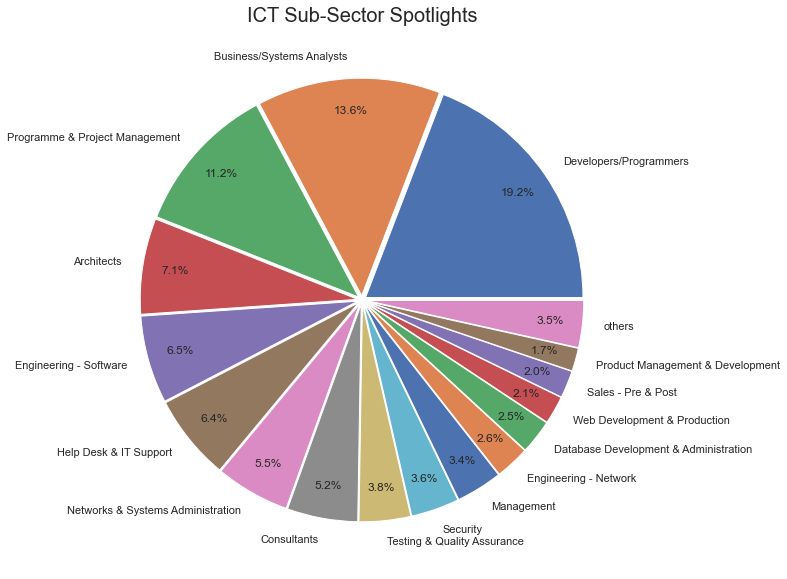

In [753]:
SubClassification = df[df['Classification'] == classificationDf['Classification'].iloc[0]].groupby('SubClassification', 
                                                                                    as_index=False).count().sort_values(by='Id', ascending=False)
top_17 = SubClassification[:17].copy()
other = pd.DataFrame(data = {'SubClassification' : ['others'], 'Id' : [SubClassification['Id'][17:].sum()]})
SubClassification = pd.concat([top_17, other])
SubClassification.drop(SubClassification.index[8], inplace=True)
explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

fig = plt.figure(figsize=(10, 10))
plt.pie(data=SubClassification, x=SubClassification.Id, labels= SubClassification.SubClassification, 
        colors=sns.color_palette('deep'), autopct='%0.1f%%', pctdistance=0.85, explode=explode)
plt.title("ICT Sub-Sector Spotlights", size=20)

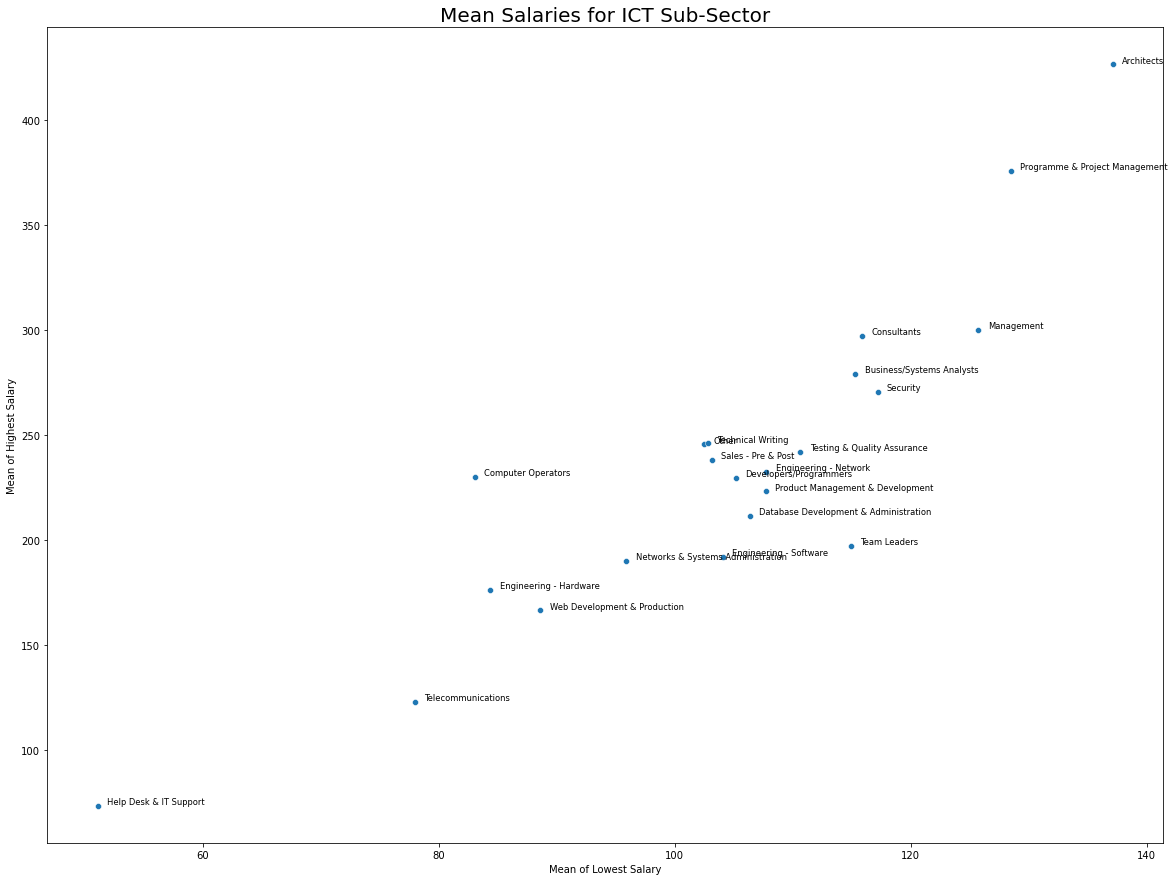

In [679]:
ICT_df = df[df.Classification == 'Information & Communication Technology']
Sub_Sector = ICT_df.groupby('SubClassification')
Sectors = []
LowestSalary_means = []
HighestSalary_means = []

for Sector, row in Sub_Sector:
    HighestSalary_means.append(row['HighestSalary'].mean())
    LowestSalary_means.append(row['LowestSalary'].mean())
    Sectors.append(Sector)

plt.figure(figsize=(20, 15))
ax = sns.scatterplot(x = LowestSalary_means, y = HighestSalary_means)

for i in range(len(Sectors)):
    ax.text(LowestSalary_means[i]+0.8, HighestSalary_means[i]+0.8, Sectors[i], horizontalalignment='left', size='small')

plt.title('Mean Salaries for ICT Sub-Sector', size=20)
plt.xlabel('Mean of Lowest Salary')
plt.ylabel('Mean of Highest Salary')
plt.show()

## Trades & Services

Text(0.5, 1.0, 'Trades & Services Sub-Sector Spotlights')

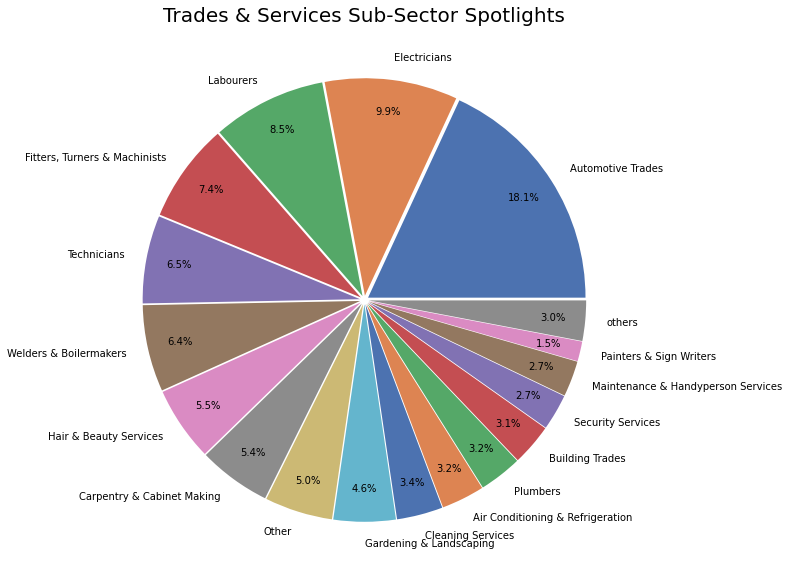

In [697]:
SubClassification = df[df['Classification'] == classificationDf['Classification'].iloc[1]].groupby('SubClassification', 
                                                                                    as_index=False).count().sort_values(by='Id', ascending=False)
top_17 = SubClassification[:17].copy()
other = pd.DataFrame(data = {'SubClassification' : ['others'], 'Id' : [SubClassification['Id'][17:].sum()]})
SubClassification = pd.concat([top_17, other])
explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

fig = plt.figure(figsize=(10, 10))
plt.pie(data=SubClassification, x=SubClassification.Id, labels= SubClassification.SubClassification, 
        colors=sns.color_palette('deep'), autopct='%0.1f%%', pctdistance=0.85, explode=explode)
plt.title("Trades & Services Sub-Sector Spotlights", size=20)

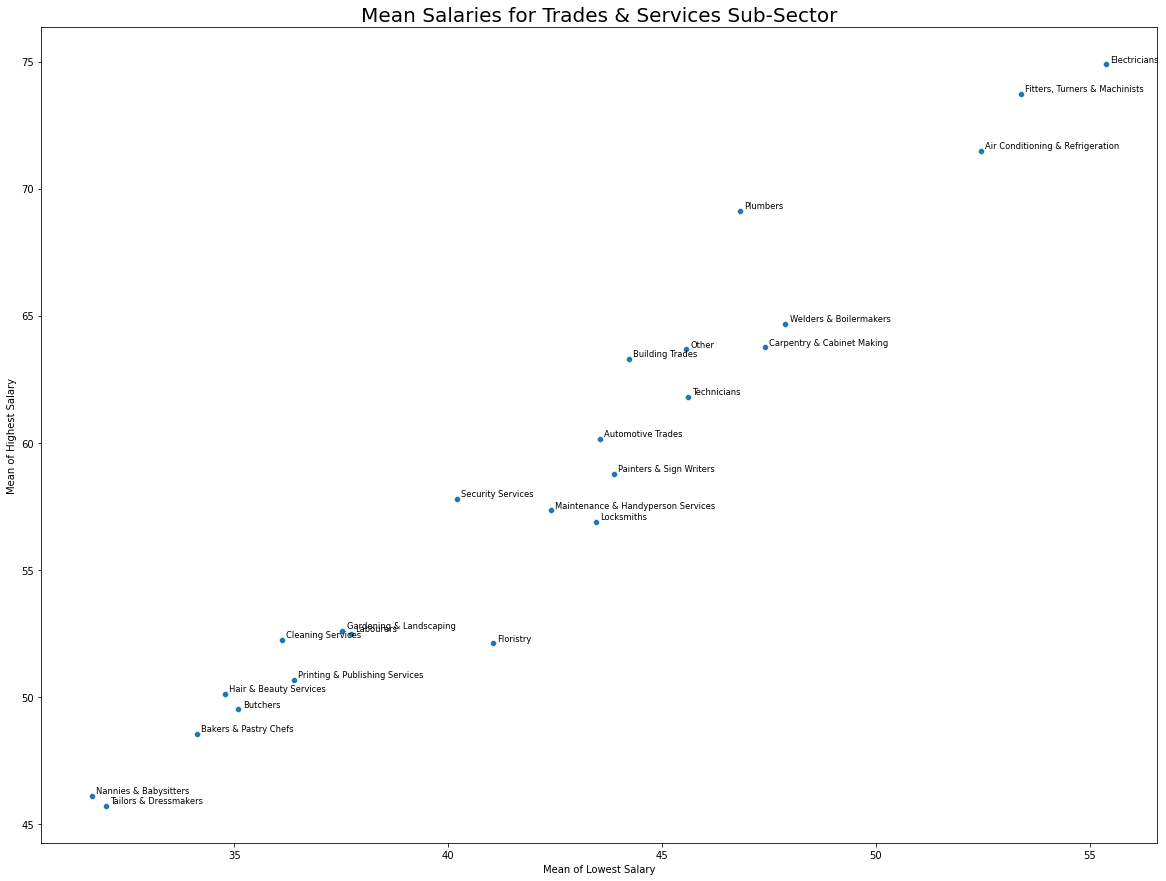

In [691]:
Trades_df = df[df.Classification == 'Trades & Services']
Sub_Sector = Trades_df.groupby('SubClassification')
Sectors = []
LowestSalary_means = []
HighestSalary_means = []

for Sector, row in Sub_Sector:
    HighestSalary_means.append(row['HighestSalary'].mean())
    LowestSalary_means.append(row['LowestSalary'].mean())
    Sectors.append(Sector)

plt.figure(figsize=(20, 15))
ax = sns.scatterplot(x = LowestSalary_means, y = HighestSalary_means)

for i in range(len(Sectors)):
    ax.text(LowestSalary_means[i]+0.1, HighestSalary_means[i]+0.1, Sectors[i], horizontalalignment='left', size='small')

plt.title('Mean Salaries for Trades & Services Sub-Sector', size=20)
plt.xlabel('Mean of Lowest Salary')
plt.ylabel('Mean of Highest Salary')
plt.show()

## Healthcare & Medical

Text(0.5, 1.0, 'Healthcare & Medical Sub-Sector Spotlights')

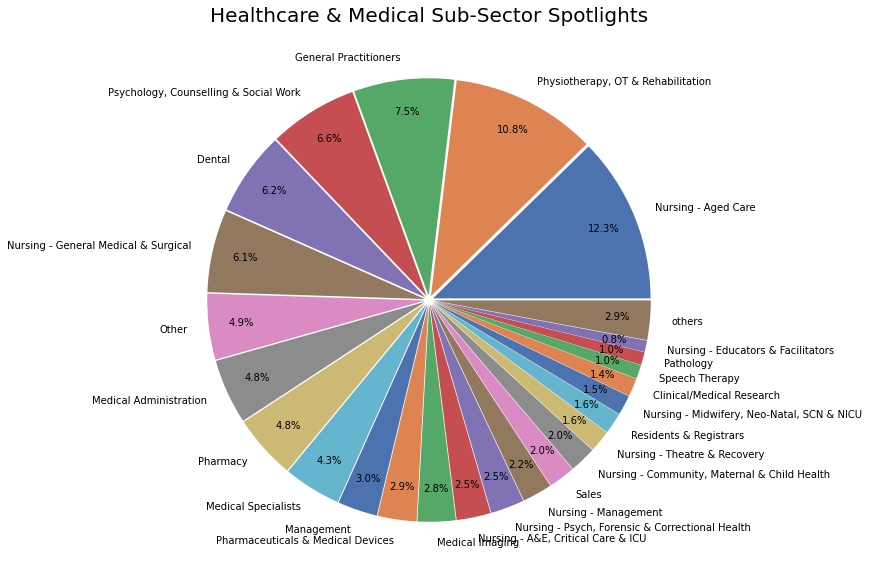

In [696]:
SubClassification = df[df['Classification'] == classificationDf['Classification'].iloc[2]].groupby('SubClassification', 
                                                                                    as_index=False).count().sort_values(by='Id', ascending=False)
top_17 = SubClassification[:25].copy()
other = pd.DataFrame(data = {'SubClassification' : ['others'], 'Id' : [SubClassification['Id'][25:].sum()]})
SubClassification = pd.concat([top_17, other])
explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,0.02, 0.02, 0.02, 0.02, 
         0.02, 0.02, 0.02, 0.02,0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

fig = plt.figure(figsize=(10, 10))
plt.pie(data=SubClassification, x=SubClassification.Id, labels= SubClassification.SubClassification, 
        colors=sns.color_palette('deep'), autopct='%0.1f%%', pctdistance=0.85, explode=explode)
plt.title("Healthcare & Medical Sub-Sector Spotlights", size=20)

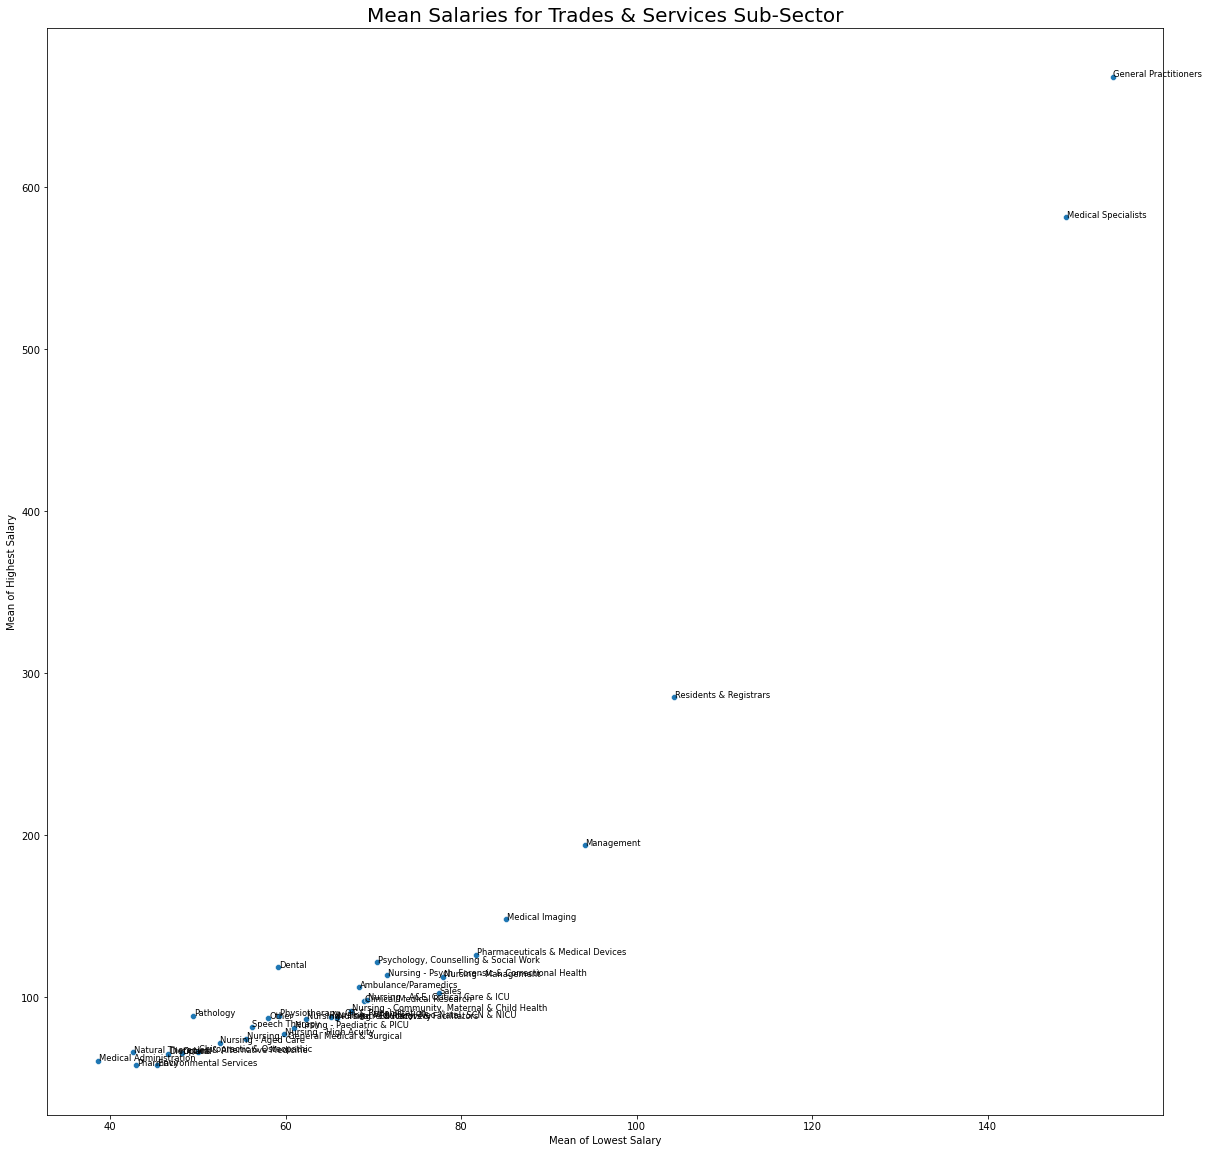

In [701]:
Healthcare_df = df[df.Classification == 'Healthcare & Medical']
Sub_Sector = Healthcare_df.groupby('SubClassification')
Sectors = []
LowestSalary_means = []
HighestSalary_means = []

for Sector, row in Sub_Sector:
    HighestSalary_means.append(row['HighestSalary'].mean())
    LowestSalary_means.append(row['LowestSalary'].mean())
    Sectors.append(Sector)

plt.figure(figsize=(20, 20))
ax = sns.scatterplot(x = LowestSalary_means, y = HighestSalary_means)

for i in range(len(Sectors)):
    ax.text(LowestSalary_means[i]+0.1, HighestSalary_means[i]+0.1, Sectors[i], horizontalalignment='left', size='small')

plt.title('Mean Salaries for Trades & Services Sub-Sector', size=20)
plt.xlabel('Mean of Lowest Salary')
plt.ylabel('Mean of Highest Salary')
plt.show()

## Hospitality & Tourism

Text(0.5, 1.0, 'Hospitality & Tourism Sub-Sector Spotlights')

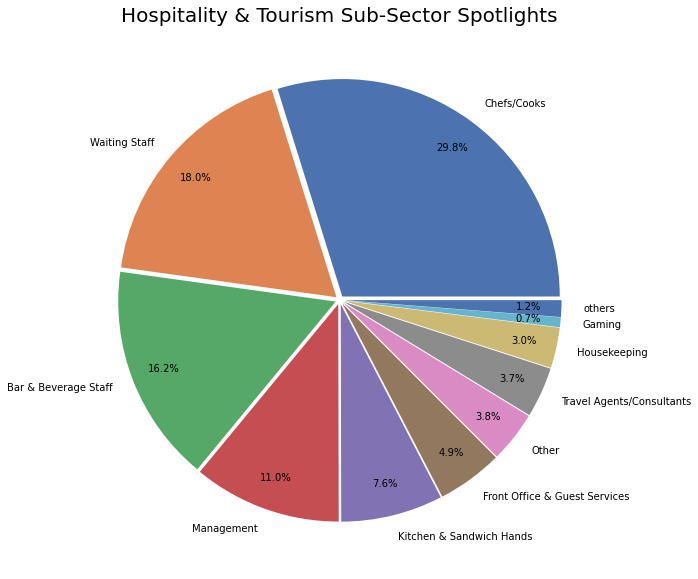

In [711]:
SubClassification = df[df['Classification'] == classificationDf['Classification'].iloc[3]].groupby('SubClassification', 
                                                                                    as_index=False).count().sort_values(by='Id', ascending=False)
top_10 = SubClassification[:10].copy()
other = pd.DataFrame(data = {'SubClassification' : ['others'], 'Id' : [SubClassification['Id'][10:].sum()]})
SubClassification = pd.concat([top_10, other])
explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

fig = plt.figure(figsize=(10, 10))
plt.pie(data=SubClassification, x=SubClassification.Id, labels= SubClassification.SubClassification, 
        colors=sns.color_palette('deep'), autopct='%0.1f%%', pctdistance=0.85, explode=explode)
plt.title("Hospitality & Tourism Sub-Sector Spotlights", size=20)

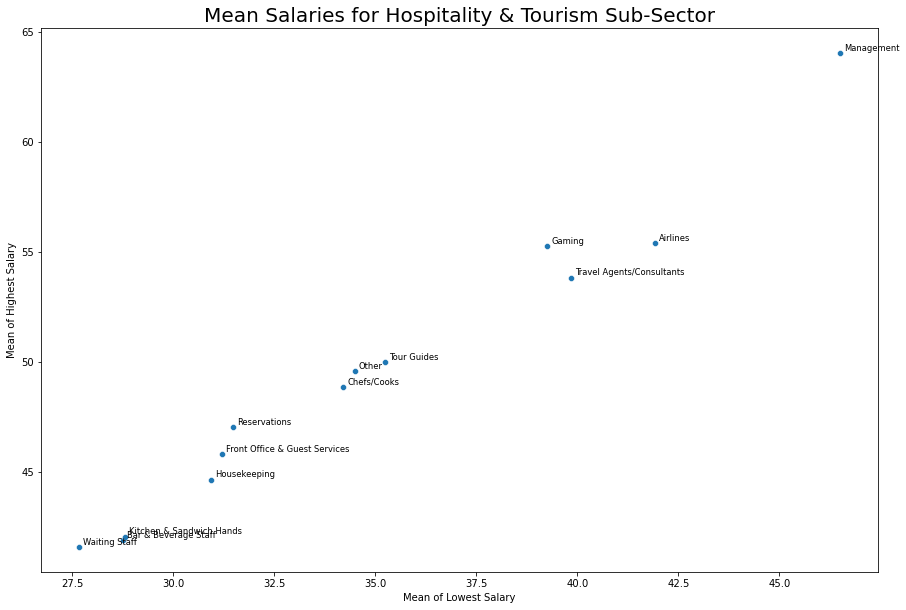

In [716]:
Hospitality_df = df[df.Classification == 'Hospitality & Tourism']
Sub_Sector = Hospitality_df.groupby('SubClassification')
Sectors = []
LowestSalary_means = []
HighestSalary_means = []

for Sector, row in Sub_Sector:
    HighestSalary_means.append(row['HighestSalary'].mean())
    LowestSalary_means.append(row['LowestSalary'].mean())
    Sectors.append(Sector)

plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x = LowestSalary_means, y = HighestSalary_means)

for i in range(len(Sectors)):
    ax.text(LowestSalary_means[i]+0.1, HighestSalary_means[i]+0.1, Sectors[i], horizontalalignment='left', size='small')

plt.title('Mean Salaries for Hospitality & Tourism Sub-Sector', size=20)
plt.xlabel('Mean of Lowest Salary')
plt.ylabel('Mean of Highest Salary')
plt.show()

# Part 3 - Evaluation

### 3.1) Findings in the Data Analytics

<p>After performing data analysis on the Job dataset, a clear trend has been dicovered</p>

# Part 4 - Case Studies

### Case Study 1

<p>The wise choice for Mathew would be to study something in the Information & Communication Technology(ICT) Sector. This is because it is the most advertised sector in the dataset, meaning it is the sector most in demmand. The ICT Sector makes up 15.6% of the Sydney job listings, 12.9% of the Brisbane joblistings and 12.7% of the Melbourne job listings. These figures can be seen in Part 2 of this report under 'Analysis of the Top 4 locations'. If Mattew chooses to pursue ICT he will have to learn some of the Requirements for the ICT Sector. These include Programming languages such as Python, C, C# and Java. These requirements are the basis on the top two Sub-sectors of ICT,Developer/Programmers at 19.2% and Business/Systems Analysts at 13.6%. This means Mattew has a high chance of employment when he learns these ICT requirements. The ICT Sector also has the second highest average salary in the job listing, sitting at $181.975. This means if Mattew pursues a career in ICT, he will be highly employable and well paid. So if this is Mathews future, then what can he do about it now. Mathew should try his hardest to develop appropriate skills through his computer science degree and develop problem solving skills to solidify a successful future career in ICT</p>

### Case Study 2

<p>The first step to this solution would be to follow the same steps taken in part 1 of this report, perform any necessary data preparation and preprocessing on the given dataset. This is to make sure the data is clean and usable, so any unforseen issues dont happen down the line. The next step would be to look for key data in the employee's CV, this can be keywords, geographical information, skills, etc. One method for extracting this data is Term Frequency-Inverse Document Frequency. The next step match the geographical information with the location on the job listings and eliminate any jobs that are not close. This would increase the employee's chance of taking the job, because no one wants to flight to Sydney if they will in Brisbane. The next step would be to search for Job requirements/skills that are similiar to the skills stated in the employee's CV. This will ensure they are suited to the Job and not thrown in the deep end working on something they have no idea about. The last step would be to match any keywords found in the employee's CV will words in the job listings. This will ensure that we return a list of jobs based on what they like/want to do. Finally, return a top ten list of jobs in descending order to the employee.</p>